# **COMP 551 Assignment 1** <br>
Team Members: Jimmy Sheng, Iris Wang, Keyu Wang

# Task 1: Acquire, preprocess, and analyze the data


### Data sources


*   [NHANES](https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset)
*   [CANCER](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)




In [ ]:
!pip install scikit-learn
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from ucimlrepo import fetch_ucirepo
from IPython.display import display
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

%matplotlib inline

## 1. Load datasets

In [ ]:
### NHANES ###
# fetch dataset
NHANES = fetch_ucirepo(id=887)
# data (as pandas dataframes)
NHANES_X = NHANES.data.features
NHANES_y = NHANES.data.targets
# metadata
# display(NHANES.metadata)
# variable information
print("\n\nNHANES")
display(NHANES.variables)

### Breast Cancer Wisconsin ###
# fetch dataset
CANCER = fetch_ucirepo(id=15)
# data (as pandas dataframes)
CANCER_X = CANCER.data.features
CANCER_y = CANCER.data.targets
CANCER_ID = CANCER.data.ids
# metadata
# display(CANCER.metadata)
# variable information
print("\n\nBreast Cancer Wisconsin")
display(CANCER.variables)



NHANES


,name,role,type,demographic,description,units,missing_values
0,SEQN,ID,Continuous,None,Respondent Sequence Number,None,no
1,age_group,Target,Categorical,Age,Respondent's Age Group (senior/non-senior),None,no
2,RIDAGEYR,Other,Continuous,Age,Respondent's Age,None,no
3,RIAGENDR,Feature,Continuous,Gender,Respondent's Gender,None,no
4,PAQ605,Feature,Continuous,None,If the respondent engages in moderate or vigor...,None,no
5,BMXBMI,Feature,Continuous,None,Respondent's Body Mass Index,None,no
6,LBXGLU,Feature,Continuous,None,Respondent's Blood Glucose after fasting,None,no
7,DIQ010,Feature,Continuous,None,If the Respondent is diabetic,None,no
8,LBXGLT,Feature,Continuous,None,Respondent's Oral,None,no
9,LBXIN,Feature,Continuous,None,Respondent's Blood Insulin Levels,None,no




Breast Cancer Wisconsin


,name,role,type,demographic,description,units,missing_values
0,Sample_code_number,ID,Categorical,None,None,None,no
1,Clump_thickness,Feature,Integer,None,None,None,no
2,Uniformity_of_cell_size,Feature,Integer,None,None,None,no
3,Uniformity_of_cell_shape,Feature,Integer,None,None,None,no
4,Marginal_adhesion,Feature,Integer,None,None,None,no
5,Single_epithelial_cell_size,Feature,Integer,None,None,None,no
6,Bare_nuclei,Feature,Integer,None,None,None,yes
7,Bland_chromatin,Feature,Integer,None,None,None,no
8,Normal_nucleoli,Feature,Integer,None,None,None,no
9,Mitoses,Feature,Integer,None,None,None,no


## 2. Clean data<br>

From the previous section, we see that there are only missing values in column "Bare_nuclei" from the CANCER dataset. Here we drop the NULL values. We also remove duplicate rows in the CANCER dataset when every column including the ID is a duplicate.

### NHANES

In [ ]:
# filter NA
display(NHANES_X.isna().sum())

RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64

In [ ]:
NHANES_X_clean = NHANES_X
NHANES_y_clean = NHANES_y
# concatenate feature and target together for later analysis
NHANES_df_clean = pd.concat([NHANES_X_clean, NHANES_y_clean], axis=1)

### CANCER

In [ ]:
# detect duplicates by concatenating with ID
CANCER_ID_concat = pd.concat([CANCER_ID, CANCER_X], axis=1)
print(f'{CANCER_ID_concat.duplicated().sum()} duplicated rows')

CANCER_ID_concat_dropped = CANCER_ID_concat.drop_duplicates()
dropped_indices = CANCER_X.index.difference(CANCER_ID_concat_dropped.index)
print("Dropping the following duplicated rows from Breast Cancer Wisconsin dataset:")
display(dropped_indices)
CANCER_X = CANCER_X.drop(index=dropped_indices)
CANCER_y = CANCER_y.drop(index=dropped_indices)
CANCER_ID = CANCER_ID.drop(index=dropped_indices)

CANCER_ID_concat = pd.concat([CANCER_ID, CANCER_X], axis=1)
print(f'{CANCER_ID_concat.duplicated().sum()} duplicated rows')

8 duplicated rows
Dropping the following duplicated rows from Breast Cancer Wisconsin dataset:


Int64Index([208, 253, 254, 258, 272, 338, 561, 684], dtype='int64')

0 duplicated rows


In [ ]:
# detect and drop rows containing empty values
display(CANCER_X.isna().sum())

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [ ]:
# show the process of dropping rows in y with indices in X
print('Dropping the following rows from Breast Cancer Wisconsin dataset:')
CANCER_X_dropped = CANCER_X.dropna()
dropped_indices = CANCER_X.index.difference(CANCER_X_dropped.index)
display(dropped_indices)
CANCER_y_dropped = CANCER_y.drop(index=dropped_indices)
display(CANCER_y.index.difference(CANCER_y_dropped.index))

CANCER_X_clean = CANCER_X_dropped
CANCER_y_clean = CANCER_y_dropped
# concatenate feature and target together for later analysis
CANCER_df_clean = pd.concat([CANCER_X_clean, CANCER_y_clean], axis=1)

Dropping the following rows from Breast Cancer Wisconsin dataset:


Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')

Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')

In [ ]:
print('Verification:')
display(CANCER_df_clean.isna().sum())

Verification:


Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

As an extra step, we also plotted the histogram of each feature to see if there is a malformed feature.

*   DIQ010 (**Doctor told you have diabetes**) seems odd to have unevenly distributed into 3 values, but when we searched it up, it makes sense:
  - 1 represents "yes", 2 represents "no", & 3 represents "borderline".



In [ ]:
def plot_distribution_per_feature(df, graphs_per_row):
    num_cols = len(df.columns)
    # Calculate the number of rows needed
    num_rows = (num_cols + graphs_per_row - 1) // graphs_per_row

    fig, axes = plt.subplots(nrows=num_rows, ncols=graphs_per_row, figsize=(5*graphs_per_row, 4*num_rows))

    for i, column in enumerate(df.columns):
        # Calculate the row and column index for each subplot
        ax = axes[i // graphs_per_row, i % graphs_per_row]
        ax.hist(df[column], bins=10, alpha=0.7)
        ax.set_title(f'Distribution of feature: {column}')
        ax.set_xlabel(column)

    # Remove the unused subplots in the last row
    for i in range(num_cols, num_rows * graphs_per_row):
      fig.delaxes(axes[i // graphs_per_row, i % graphs_per_row])

    plt.tight_layout()
    plt.show()

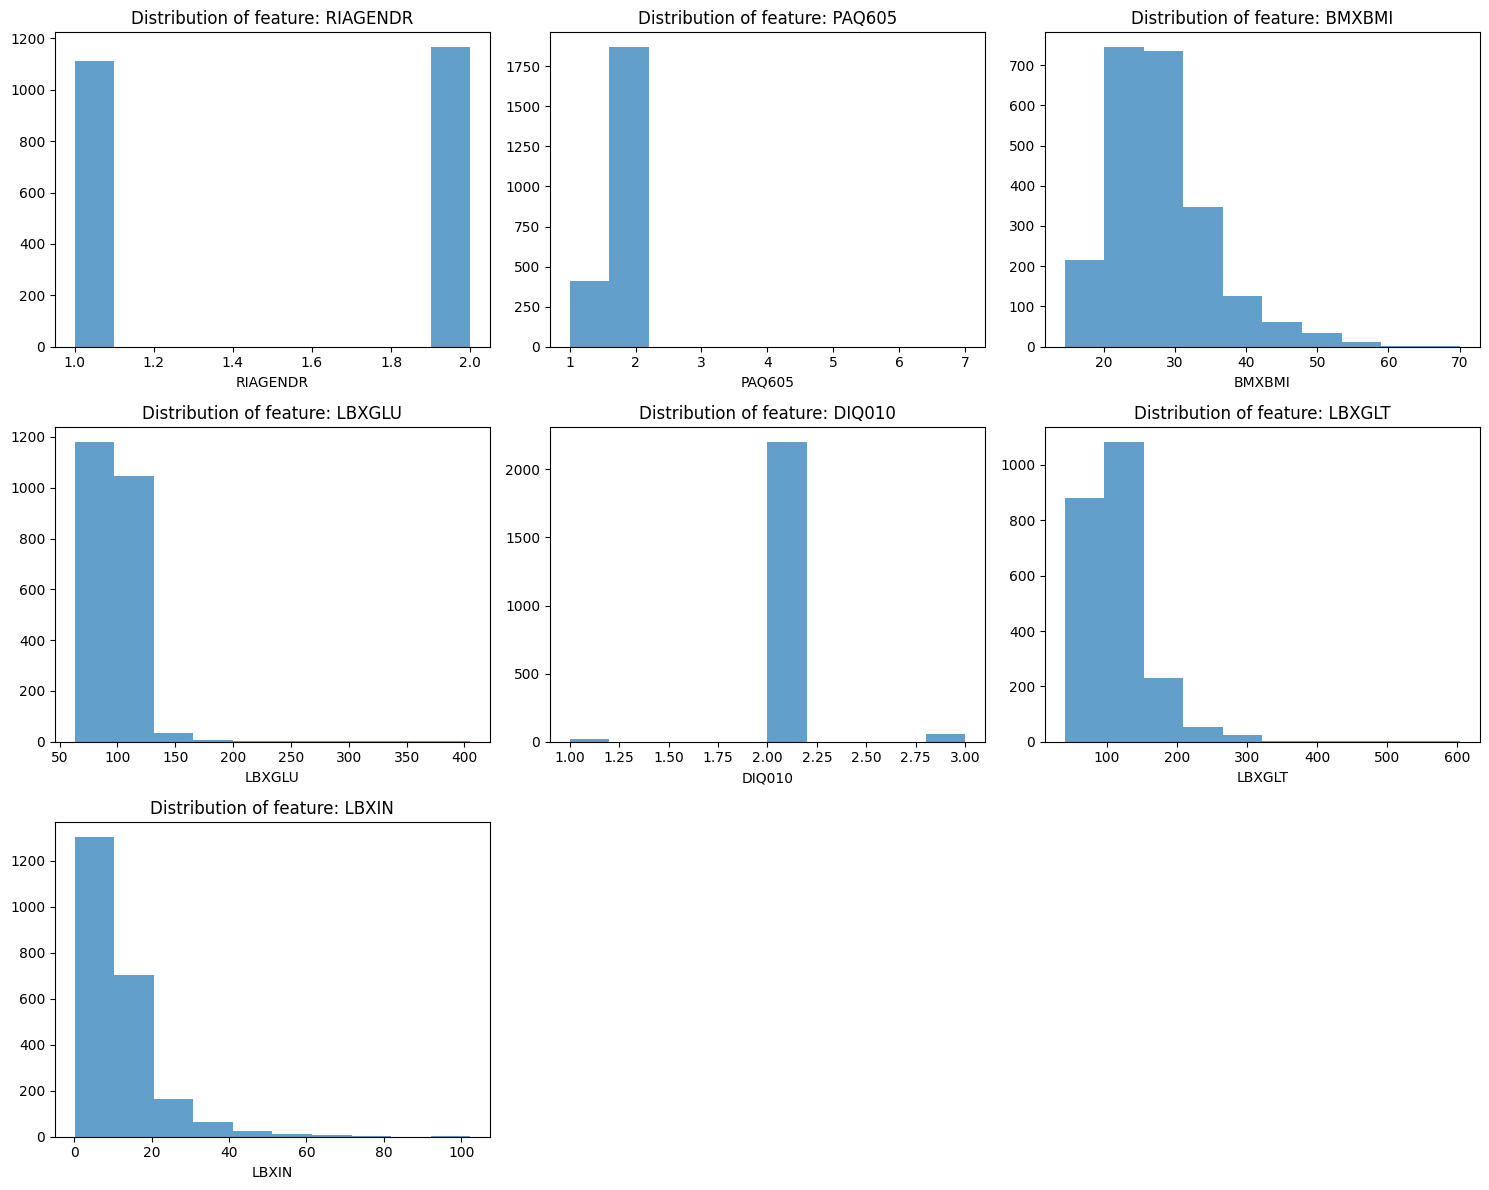

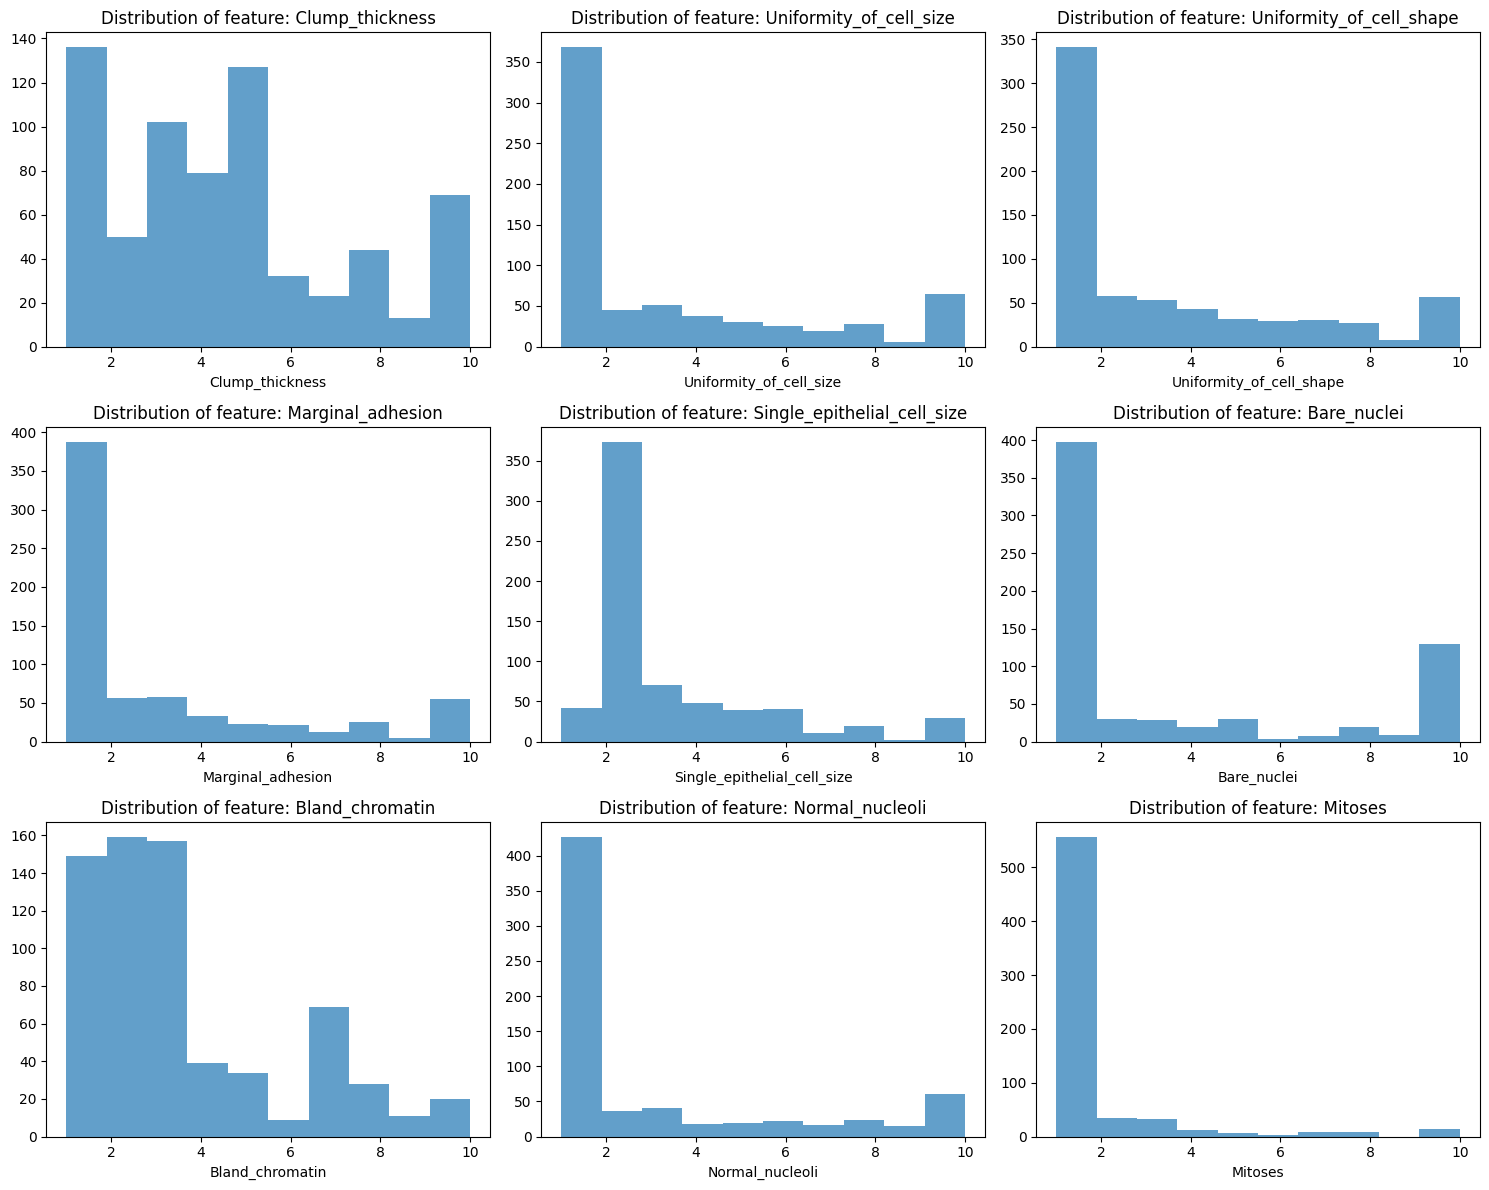

In [ ]:
# plot for NHANES features
plot_distribution_per_feature(NHANES_X_clean, 3)
# plot for CANCER features
plot_distribution_per_feature(CANCER_X_clean, 3)

## 3. Compute basic statistics

### Utility functions

In [ ]:
def get_group(df: pd.DataFrame, target_col_name: str, target_value):
  return df[df[target_col_name] == target_value]

def get_group_means(df: pd.DataFrame):
  df_mean = df.mean(numeric_only=True).to_frame()
  df_mean.columns = ['mean']
  return df_mean

# standard deviation
def get_group_std(df: pd.DataFrame):
  df_std = df.std(numeric_only=True).to_frame()
  df_std.columns = ['std']
  return df_std

def merge_groups(df1: pd.DataFrame, df2: pd.DataFrame):
  return df1.merge(df2, left_index=True, right_index=True)

def get_feature_means_for_pos_neg(df: pd.DataFrame, target_col_name: str, pos_value, neg_value):
  pos_group = get_group(df, target_col_name, pos_value)
  neg_group = get_group(df, target_col_name, neg_value)
  pos_means = get_group_means(pos_group)
  neg_means = get_group_means(neg_group)

  feature_means = merge_groups(pos_means, neg_means)
  feature_means.columns = [f'{pos_value} mean', f'{neg_value} mean']
  return feature_means

### NHANES

NHANES - Positive vs negative mean

In [ ]:
NHANES_POS_VALUE = 'Senior'
NHANES_NEG_VALUE = 'Adult'
NHANES_TARGET_COL_NAME = 'age_group'

NHANES_means = get_feature_means_for_pos_neg(NHANES_df_clean, NHANES_TARGET_COL_NAME, NHANES_POS_VALUE, NHANES_NEG_VALUE)
display(NHANES_means)

,Senior mean,Adult mean
RIAGENDR,1.508242,1.512017
PAQ605,1.909341,1.806165
BMXBMI,27.886264,27.968286
LBXGLU,104.329670,98.644723
DIQ010,2.027473,2.014107
LBXGLT,141.208791,109.990596
LBXIN,10.405247,12.106661


NHANES - Squared difference ranked

In [ ]:
NHANES_means['Squared diff'] = (NHANES_means[f'{NHANES_POS_VALUE} mean'] - NHANES_means[f'{NHANES_NEG_VALUE} mean']) ** 2
NHANES_means_sorted = NHANES_means.sort_values(by='Squared diff', ascending=False)
display(NHANES_means_sorted)

,Senior mean,Adult mean,Squared diff
LBXGLT,141.208791,109.990596,974.575736
LBXGLU,104.329670,98.644723,32.318625
LBXIN,10.405247,12.106661,2.894810
PAQ605,1.909341,1.806165,0.010645
BMXBMI,27.886264,27.968286,0.006728
DIQ010,2.027473,2.014107,0.000179
RIAGENDR,1.508242,1.512017,0.000014


NHANES - Positive (Senior)

In [ ]:
NHANES_pos_group = get_group(NHANES_df_clean, NHANES_TARGET_COL_NAME, NHANES_POS_VALUE)
display(NHANES_pos_group.describe())

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,364.000000,364.000000,364.000000,364.00000,364.000000,364.000000,364.000000
mean,1.508242,1.909341,27.886264,104.32967,2.027473,141.208791,10.405247
std,0.500620,0.287519,5.574166,14.96667,0.266211,51.549440,7.530538
min,1.000000,1.000000,16.800000,80.00000,1.000000,48.000000,1.020000
25%,1.000000,2.000000,24.200000,95.00000,2.000000,104.000000,5.247500
50%,2.000000,2.000000,27.200000,101.00000,2.000000,131.000000,8.465000
75%,2.000000,2.000000,30.600000,111.00000,2.000000,166.250000,13.212500
max,2.000000,2.000000,52.200000,208.00000,3.000000,346.000000,52.890000


NHANES - Negative (Adult/Non-senior)

In [ ]:
NHANES_neg_group = get_group(NHANES_df_clean, NHANES_TARGET_COL_NAME, NHANES_NEG_VALUE)
display(NHANES_neg_group.describe())

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,1.512017,1.806165,27.968286,98.644723,2.014107,109.990596,12.106661
std,0.499986,0.414761,7.526555,18.255726,0.165850,44.453655,10.060040
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,1.000000,2.000000,22.600000,91.000000,2.000000,84.000000,5.982500
50%,2.000000,2.000000,26.750000,96.000000,2.000000,101.000000,9.200000
75%,2.000000,2.000000,31.400000,103.000000,2.000000,124.000000,14.790000
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


NHANES - Selecting features

In [ ]:
# select three highest diff columns
NHANES_X_clean = NHANES_X_clean[['LBXGLT', 'LBXGLU', 'LBXIN']].copy()

### CANCER

CANCER - Positive vs negative mean

In [ ]:
CANCER_POS_VALUE = 4
CANCER_NEG_VALUE = 2
CANCER_CLASS_NAME = {4: 'Malignant', 2: 'Benign'}
CANCER_TARGET_COL_NAME = 'Class'

CANCER_means = get_feature_means_for_pos_neg(CANCER_df_clean, CANCER_TARGET_COL_NAME, CANCER_POS_VALUE, CANCER_NEG_VALUE)
CANCER_means.drop(index=[CANCER_TARGET_COL_NAME], inplace=True)
CANCER_means.columns = [f'{CANCER_CLASS_NAME[CANCER_POS_VALUE]} mean', f'{CANCER_CLASS_NAME[CANCER_NEG_VALUE]} mean']
display(CANCER_means)

,Malignant mean,Benign mean
Clump_thickness,7.203390,2.972665
Uniformity_of_cell_size,6.563559,1.309795
Uniformity_of_cell_shape,6.538136,1.419134
Marginal_adhesion,5.635593,1.350797
Single_epithelial_cell_size,5.305085,2.113895
Bare_nuclei,7.605932,1.350797
Bland_chromatin,5.978814,2.079727
Normal_nucleoli,5.902542,1.264237
Mitoses,2.614407,1.066059


CANCER - Squared difference ranked

In [ ]:
CANCER_means['Squared diff'] = (CANCER_means[f'{CANCER_CLASS_NAME[CANCER_POS_VALUE]} mean'] - CANCER_means[f'{CANCER_CLASS_NAME[CANCER_NEG_VALUE]} mean']) ** 2
CANCER_means_sorted = CANCER_means.sort_values(by='Squared diff', ascending=False)
display(CANCER_means_sorted)

,Malignant mean,Benign mean,Squared diff
Bare_nuclei,7.605932,1.350797,39.126713
Uniformity_of_cell_size,6.563559,1.309795,27.602040
Uniformity_of_cell_shape,6.538136,1.419134,26.204173
Normal_nucleoli,5.902542,1.264237,21.513878
Marginal_adhesion,5.635593,1.350797,18.359476
Clump_thickness,7.203390,2.972665,17.899031
Bland_chromatin,5.978814,2.079727,15.202879
Single_epithelial_cell_size,5.305085,2.113895,10.183691
Mitoses,2.614407,1.066059,2.397380


CANCER - Positive (Malignant)

In [ ]:
CANCER_pos_group = get_group(CANCER_df_clean, CANCER_TARGET_COL_NAME, CANCER_POS_VALUE)
display(CANCER_pos_group.describe())

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0
mean,7.203390,6.563559,6.538136,5.635593,5.305085,7.605932,5.978814,5.902542,2.614407,4.0
std,2.434012,2.713282,2.563788,3.185513,2.428583,3.128695,2.286774,3.344579,2.576416,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000,4.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,10.000000,7.250000,10.000000,3.000000,4.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0


CANCER - Negative (Benign)

In [ ]:
CANCER_neg_group = get_group(CANCER_df_clean, CANCER_TARGET_COL_NAME, CANCER_NEG_VALUE)
display(CANCER_neg_group.describe())

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0
mean,2.972665,1.309795,1.419134,1.350797,2.113895,1.350797,2.079727,1.264237,1.066059,2.0
std,1.671458,0.859898,0.961448,0.921555,0.878855,1.183966,1.064377,0.959629,0.512591,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.0
75%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.0
max,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,8.000000,8.000000,2.0


# Task 2: Implementing KNN and DT

## 0. Prepare the data

### Standarization (KNN)

NHANES

In [ ]:
NHANES_X_clean_means = NHANES_X_clean.mean()
NHANES_X_clean_std = NHANES_X_clean.std()

NHANES_X_clean_standardized = (NHANES_X_clean - NHANES_X_clean_means) / NHANES_X_clean_std
display(NHANES_X_clean_standardized)

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0.977213,0.444574,1.068404,0.583956,-0.087533,0.744160,0.316418
1,0.977213,0.444574,-1.056038,-0.589895,-0.087533,-0.743264,-0.821581
2,-1.022869,0.444574,-0.655981,-0.589895,-0.087533,-0.998251,-0.585956
3,-1.022869,0.444574,0.130339,0.248570,-0.087533,-0.658268,0.444006
4,0.977213,-2.062208,1.095994,0.192673,-0.087533,-0.722015,-0.094126
...,...,...,...,...,...,...,...
2273,0.977213,0.444574,0.764912,0.024980,-0.087533,-0.892006,-0.545827
2274,-1.022869,0.444574,0.282085,-0.366304,-0.087533,1.976596,0.121950
2275,-1.022869,0.444574,-0.587005,0.192673,-0.087533,0.191688,0.985224
2276,0.977213,0.444574,-0.076588,-0.533997,-0.087533,-0.148295,-0.704283


CANCER

In [ ]:
CANCER_X_clean_means = CANCER_X_clean.mean()
CANCER_X_clean_std = CANCER_X_clean.std()

CANCER_X_clean_standardized = (CANCER_X_clean - CANCER_X_clean_means) / CANCER_X_clean_std
display(CANCER_X_clean_standardized)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,0.194320,-0.702672,-0.742097,-0.642887,-0.556772,-0.697600,-0.180514,-0.615188,-0.348883
1,0.194320,0.279323,0.265781,0.747974,1.707211,1.776375,-0.180514,-0.288989,-0.348883
2,-0.514684,-0.702672,-0.742097,-0.642887,-0.556772,-0.422714,-0.180514,-0.615188,-0.348883
3,0.548821,1.588650,1.609618,-0.642887,-0.103976,0.127058,-0.180514,1.342010,-0.348883
4,-0.160182,-0.702672,-0.742097,0.052544,-0.556772,-0.697600,-0.180514,-0.615188,-0.348883
...,...,...,...,...,...,...,...,...,...
694,-0.514684,-0.702672,-0.742097,-0.642887,-0.103976,-0.422714,-0.995546,-0.615188,-0.348883
695,-0.869186,-0.702672,-0.742097,-0.642887,-0.556772,-0.697600,-0.995546,-0.615188,-0.348883
696,0.194320,2.243313,2.281536,0.052544,1.707211,-0.147828,1.857064,2.320609,0.225498
697,-0.160182,1.588650,0.937699,0.400259,-0.103976,0.127058,2.672095,1.015810,-0.348883


### Modify to correct input types for  y

**convert target variables to integer values in [0,1]**

In [ ]:
NHANES_y_clean_final = NHANES_y_clean['age_group'].replace({'Adult': 0, 'Senior': 1})
CANCER_y_clean_final = CANCER_y_clean['Class'].replace({2: 0, 4: 1})

#check if conversion is successfull
print(f'Current distribution of NHANES target variables:\n{NHANES_y_clean_final.value_counts()}\n')
print(f'Current distribution of CANCER target variables:\n{CANCER_y_clean_final.value_counts()}')

Current distribution of NHANES target variables:
0    1914
1     364
Name: age_group, dtype: int64

Current distribution of CANCER target variables:
0    439
1    236
Name: Class, dtype: int64


### Split data for training

In [ ]:
NHANES_features_standardized = NHANES_X_clean_standardized.to_numpy()
NHANES_features_nonstd = NHANES_X_clean.to_numpy()
NHANES_targets = NHANES_y_clean['age_group'].replace({'Adult': 0, 'Senior': 1}).to_numpy()
CANCER_features_standardized = CANCER_X_clean_standardized.to_numpy()
CANCER_features_nonstd = CANCER_X_clean.to_numpy()
CANCER_targets = CANCER_y_clean['Class'].replace({2: 0, 4: 1}).to_numpy()

NHANES_X_train, NHANES_X_test, NHANES_y_train, NHANES_y_test = train_test_split(NHANES_features_standardized, NHANES_targets, test_size=0.5, random_state=123, shuffle=True)
CANCER_X_train, CANCER_X_test, CANCER_y_train, CANCER_y_test = train_test_split(CANCER_features_standardized, CANCER_targets, test_size=0.5, random_state=123, shuffle=True)

## 1. KNN with distance function

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

def get_pred(y_prob):
  return np.argmax(y_prob, axis=-1)

class KNN:

  def __init__(self, K=1, dist_fn=euclidean):
    self.dist_fn = dist_fn
    self.K = K
    return

  def fit(self, x, y):
    self.x = x
    self.y = y
    self.C = np.max(y) + 1 # num classes
    return self

  def predict(self, x_test):
    num_test = x_test.shape[0]

    distances = self.dist_fn(self.x[None, :, :], x_test[:, None, :])

    knns = np.zeros((num_test, self.K), dtype=int)

    y_prob = np.zeros((num_test, self.C))
    for i in range(num_test):
      knns[i, :] = np.argsort(distances[i])[:self.K]
      y_prob[i, :] = np.bincount(self.y[knns[i, :]], minlength=self.C)

    y_prob /= self.K
    return y_prob, knns

## 2. DT with cost function

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue

            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2


class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination

    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty

    def predict(self, data_test):
        pass


def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    #BREAKPOINT!!!!
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

## 3. Utility functions

**Accuracy and AUROC**

In [ ]:
def evaluate_acc(y_true, y_pred):
    """
    Evaluate the accuracy of the model.

    Parameters:
    - y_true: numpy array, true labels
    - y_pred: numpy array, predicted labels

    Returns:
    - accuracy: float, accuracy score
    """
    accuracy = np.sum(y_pred == y_true) / len(y_true)
    return accuracy


def calculate_auroc(y_true, y_pred, plot_curve=True, title="ROC Curve"):
    """
    Calculate the Area Under the Receiver Operating Characteristic (AUROC) curve.

    Parameters:
    - y_true: numpy array, true binary labels (0 or 1)
    - y_pred: numpy array, predicted probabilities for the positive class
    - plot_curve: bool, whether to plot the ROC curve or not (default is True)
    - title: title of the plot

    Returns:
    - auroc: float, Area Under the ROC Curve
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auroc = roc_auc_score(y_true, y_pred)


    if plot_curve:
        # Plot ROC curve
        plt.clf()
        plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%auroc)
        plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="best")
        plt.show()
        #plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)
    return auroc

**KNN - Find best K**

In [ ]:
def find_best_K(features, targets, dist_fn=euclidean, max_k=10, random_state=123, test_size=0.3, visualize=False):
  """
  Given the features and targets arrays, compute the best K using a training/validation/testing split
  Returns the best K and its accuracy
  """
  X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=test_size, random_state=random_state, shuffle=True)
  X_tr, X_validation, y_tr, y_validation = train_test_split(X_train, y_train, test_size=0.5, random_state=random_state, shuffle=True)
  model_choices = []
  valid_acc = []
  n_valid = y_validation.shape[0]

  for k in range(1, max_k + 1):
    knn = KNN(K=k, dist_fn=dist_fn)
    y_validation_prob, _ = knn.fit(X_tr, y_tr).predict(X_validation)
    y_validation_pred = get_pred(y_validation_prob)
    accuracy = evaluate_acc(y_validation, y_validation_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

  # use best K to predict test data
  best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
  knn = KNN(K=best_valid_K)
  y_test_prob, _ = knn.fit(X_train, y_train).predict(X_test)
  y_test_pred = get_pred(y_test_prob)
  test_accuracy = evaluate_acc(y_test, y_test_pred)
  print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

  # visualize
  if visualize:
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

  return best_valid_K, test_accuracy

**KNN - Calculate accuracy and AUROC**

In [ ]:
def KNN_calc_acc_roc(X_train, y_train, X_test, y_test, K=5, dist_fn=euclidean, set_title='dataset', print_res=True):
  """
  Compute KNN accuracy and AUROC for the given training and test data
  """
  knn = KNN(K=K, dist_fn=dist_fn)
  prob, knns = knn.fit(X_train, y_train).predict(X_test)
  pred = get_pred(prob)
  acc = evaluate_acc(y_test, pred)
  auroc = calculate_auroc(y_test, pred, title=f'ROC for {set_title} with {K}-NN', plot_curve=print_res)
  if print_res:
    print(f'{K}-NN accuracy on {set_title} is {acc*100:.2f}%')
    print(f'{K}-NN AUROC on {set_title} is {auroc*100:.2f}%')
  return acc, auroc

# Task 3: Running experiments

In [ ]:
np.random.seed(123)

## **Compare accuracy & AUROC for different k/maximum depths**

Using self-implemented `evaluate_acc` and `calculate_auroc` functions from Task 2, we compare across different hyperparameters (k or maximum depth) & visualize.

### KNN (euclidean) with different K values

#### Selecting the best K

best K = 8, test accuracy = 0.8563829787234043


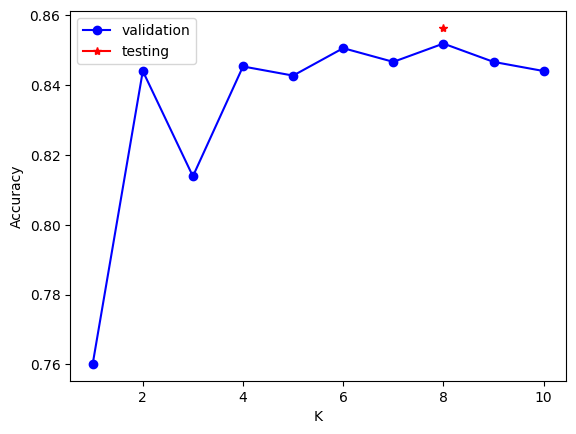

In [ ]:
NHANES_K, NHANES_KNN_ACC = find_best_K(NHANES_features_standardized, NHANES_targets, test_size=0.33, visualize=True)

best K = 8, test accuracy = 0.9730941704035875


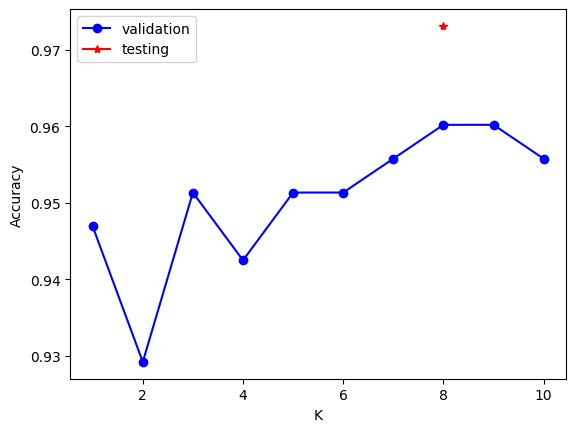

In [ ]:
CANCER_K, CANCER_KNN_ACC = find_best_K(CANCER_features_standardized, CANCER_targets, test_size=0.33, visualize=True)

#### Accuracy and AUROC with best K

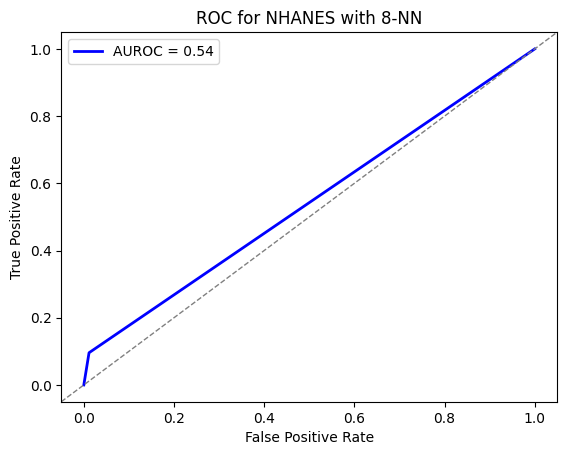

8-NN accuracy on NHANES is 84.11%
8-NN AUROC on NHANES is 54.21%


(0.8410886742756805, 0.542088954515963)

In [ ]:
KNN_calc_acc_roc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, NHANES_K, euclidean, 'NHANES')

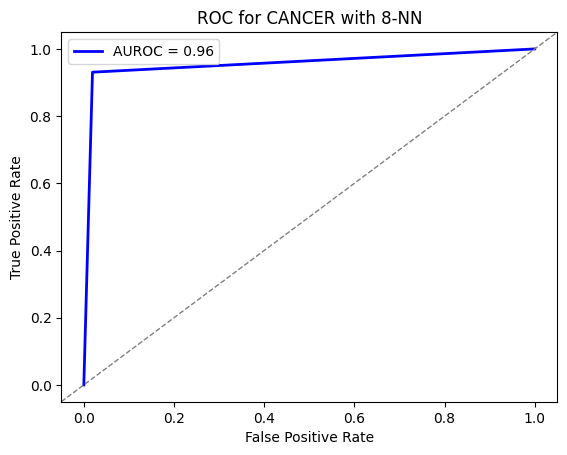

8-NN accuracy on CANCER is 96.15%
8-NN AUROC on CANCER is 95.58%


(0.9615384615384616, 0.9557692307692307)

In [ ]:
KNN_calc_acc_roc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, CANCER_K, euclidean, 'CANCER')

#### Accuracy and AUROC with different K values

In [ ]:
for i in range(1, 11):
  acc, auroc = KNN_calc_acc_roc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, i, euclidean, print_res=False)
  print(f'{i}-NN accuracy on NHANES is {acc*100:.2f}%')
  print(f'{i}-NN AUROC on NHANES is {auroc*100:.2f}%')

1-NN accuracy on NHANES is 76.91%
1-NN AUROC on NHANES is 55.87%
2-NN accuracy on NHANES is 82.44%
2-NN AUROC on NHANES is 52.78%
3-NN accuracy on NHANES is 82.18%
3-NN AUROC on NHANES is 56.47%
4-NN accuracy on NHANES is 83.76%
4-NN AUROC on NHANES is 54.00%
5-NN accuracy on NHANES is 82.79%
5-NN AUROC on NHANES is 54.49%
6-NN accuracy on NHANES is 83.67%
6-NN AUROC on NHANES is 53.31%
7-NN accuracy on NHANES is 84.11%
7-NN AUROC on NHANES is 56.34%
8-NN accuracy on NHANES is 84.11%
8-NN AUROC on NHANES is 54.21%
9-NN accuracy on NHANES is 83.67%
9-NN AUROC on NHANES is 55.01%
10-NN accuracy on NHANES is 84.11%
10-NN AUROC on NHANES is 53.57%


In [ ]:
for i in range(1, 11):
  acc, auroc = KNN_calc_acc_roc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, i, euclidean, print_res=False)
  print(f'{i}-NN accuracy on CANCER is {acc*100:.2f}%')
  print(f'{i}-NN AUROC on CANCER is {auroc*100:.2f}%')

1-NN accuracy on CANCER is 96.15%
1-NN AUROC on CANCER is 95.87%
2-NN accuracy on CANCER is 95.56%
2-NN AUROC on CANCER is 94.66%
3-NN accuracy on CANCER is 96.45%
3-NN AUROC on CANCER is 96.11%
4-NN accuracy on CANCER is 95.56%
4-NN AUROC on CANCER is 94.95%
5-NN accuracy on CANCER is 96.45%
5-NN AUROC on CANCER is 96.11%
6-NN accuracy on CANCER is 96.15%
6-NN AUROC on CANCER is 95.58%
7-NN accuracy on CANCER is 96.45%
7-NN AUROC on CANCER is 95.96%
8-NN accuracy on CANCER is 96.15%
8-NN AUROC on CANCER is 95.58%
9-NN accuracy on CANCER is 95.86%
9-NN AUROC on CANCER is 95.48%
10-NN accuracy on CANCER is 96.45%
10-NN AUROC on CANCER is 95.96%


### DT with different maximum depth

#### Utility Functions

In [ ]:
def split_data(X, y, test_size=0.5, random_state=123):
    """
    Split the input data into training and testing sets.

    Parameters:
    - X: pandas DataFrame, feature matrix
    - y: pandas Series, target variable
    - test_size: float or int, proportion of the dataset to include in the test split (default is 0.5)
    - random_state: int or None, seed for random number generation (default is None)

    Returns:
    - X_train: numpy array, feature matrix of the training set
    - X_test: numpy array, feature matrix of the testing set
    - y_train: numpy array, target variable of the training set
    - y_test: numpy array, target variable of the testing set
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Convert to numpy arrays
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()

    return X_train, X_test, y_train, y_test


def evaluate_tree_depths(X_train, X_test, y_train, y_test, max_depth_range, plot_title=None):
    """
    Evaluate Decision Trees with different max depths and create a DataFrame with the results.

    Parameters:
    - X_train: numpy array, feature matrix of the training set
    - X_test: numpy array, feature matrix of the testing set
    - y_train: numpy array, target variable of the training set
    - y_test: numpy array, target variable of the testing set
    - max_depth_range: range, range of max depths to evaluate
    - plot_title: str, title for the plot (default is None)

    Returns:
    - results_df: pandas DataFrame, DataFrame with evaluation results (columns: Max_depth, Accuracy, AUROC)
    """
    results = []

    for depth in max_depth_range:
        tree = DecisionTree(max_depth=depth)
        probs_test = tree.fit(X_train, y_train).predict(X_test)
        y_pred = np.argmax(probs_test, 1)

        accuracy_score = evaluate_acc(y_test, y_pred)
        print(f'Accuracy for max depth {depth}: {accuracy_score * 100:.1f}%.')

        auroc_score = calculate_auroc(y_test, y_pred)
        print(f'AUROC for max depth {depth}: {auroc_score:.2f}\n')

        results.append([depth, accuracy_score, auroc_score])

    # Create a DataFrame with the results
    columns = ['Max_depth', 'Accuracy', 'AUROC']
    results_df = pd.DataFrame(results, columns=columns)

    # Plotting if plot_title is provided
    if plot_title:
        plt.figure(figsize=(10, 6))
        plt.plot(results_df['Max_depth'], results_df['Accuracy'], label='Accuracy', marker='o')
        plt.plot(results_df['Max_depth'], results_df['AUROC'], label='AUROC', marker='o')
        plt.xlabel('Max Depth')
        plt.ylabel('Score')
        plt.title(plot_title)
        plt.legend()
        plt.show()

    return results_df


#### **Dataset: NHANES**

In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(NHANES_X_clean_standardized.copy(), NHANES_y_clean_final.copy())

**Call DT & store results from different max depths in [1,9]**

Accuracy for max depth 1: 83.5%.


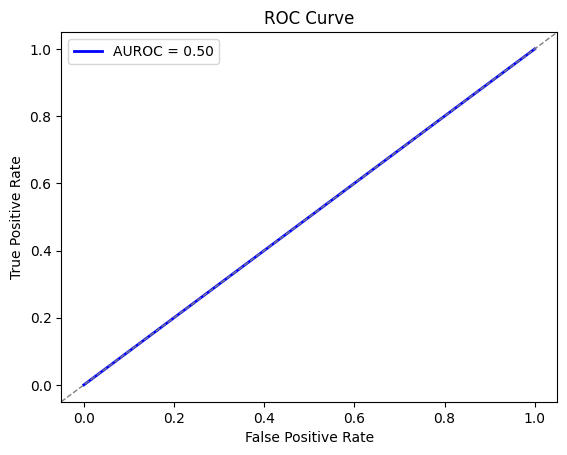

AUROC for max depth 1: 0.50

Accuracy for max depth 2: 83.5%.


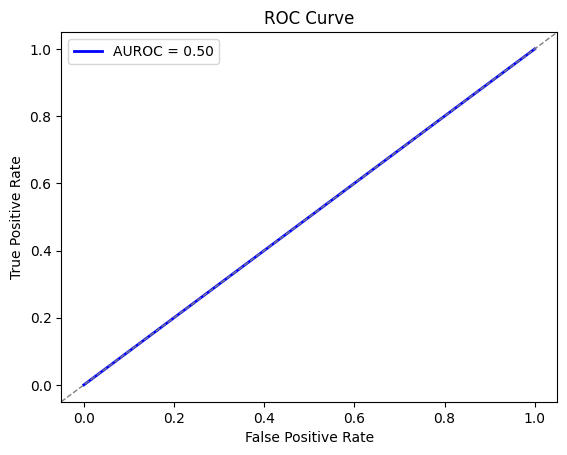

AUROC for max depth 2: 0.50

Accuracy for max depth 3: 83.4%.


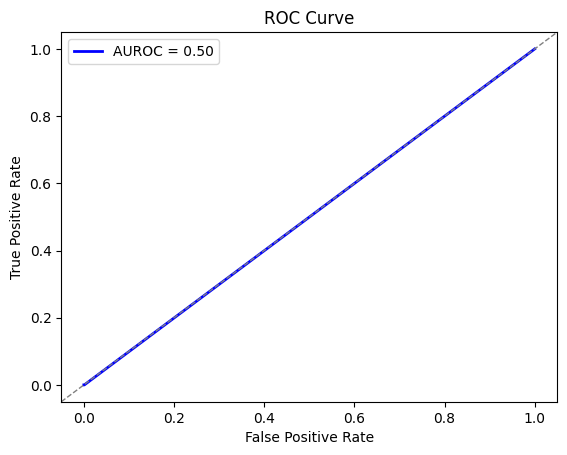

AUROC for max depth 3: 0.50

Accuracy for max depth 4: 83.1%.


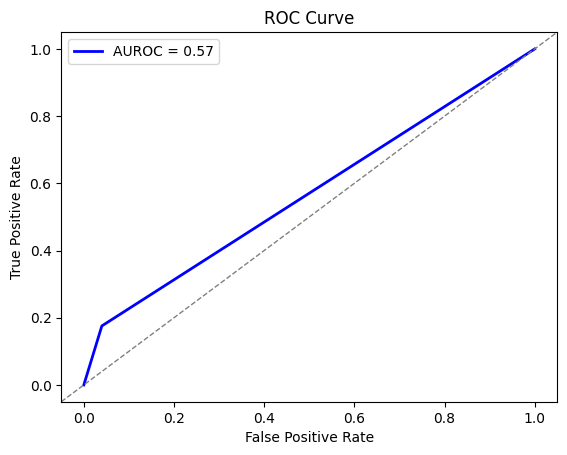

AUROC for max depth 4: 0.57

Accuracy for max depth 5: 83.1%.


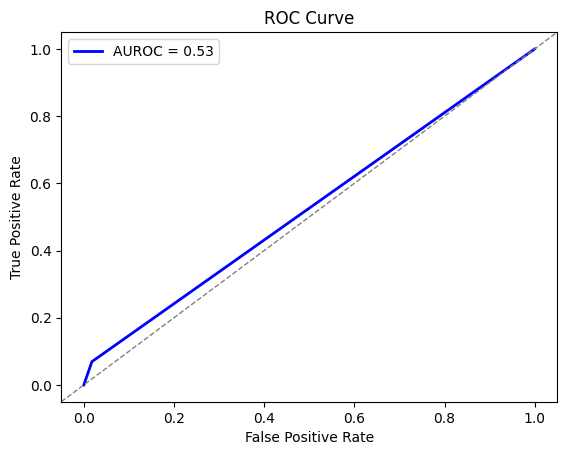

AUROC for max depth 5: 0.53

Accuracy for max depth 6: 81.8%.


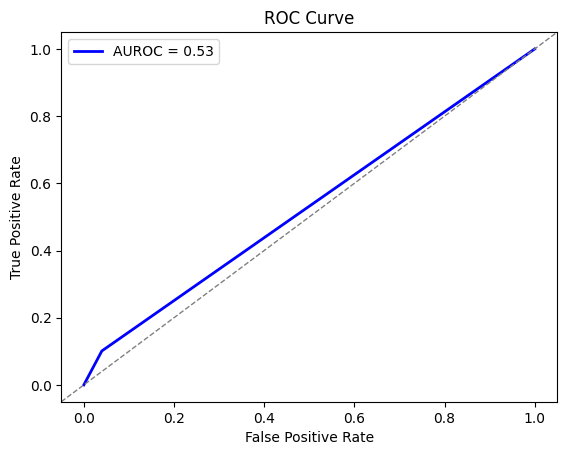

AUROC for max depth 6: 0.53

Accuracy for max depth 7: 80.7%.


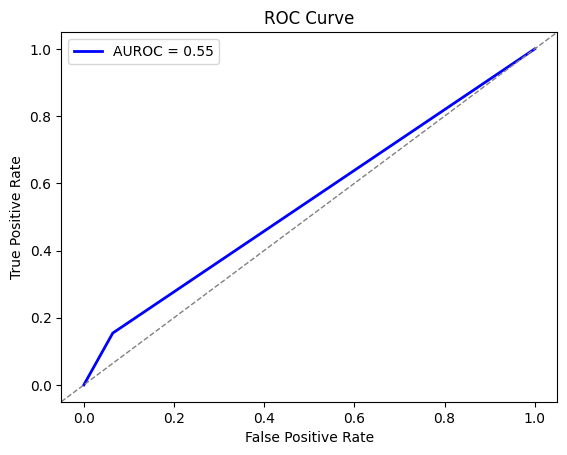

AUROC for max depth 7: 0.55

Accuracy for max depth 8: 79.9%.


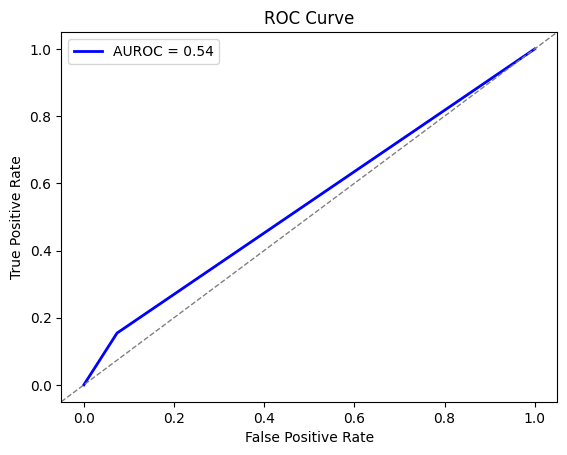

AUROC for max depth 8: 0.54

Accuracy for max depth 9: 79.8%.


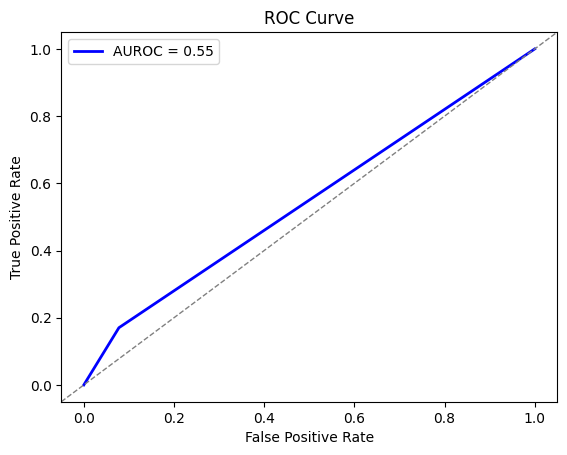

AUROC for max depth 9: 0.55



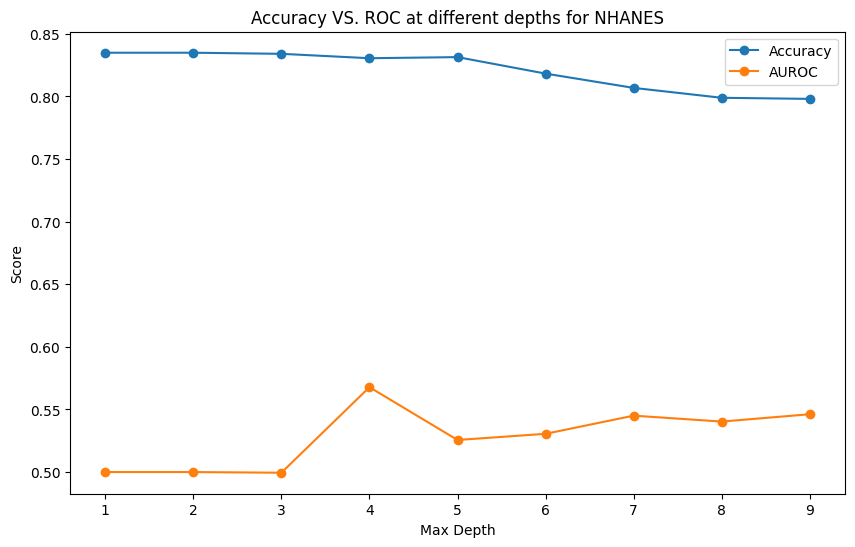

In [ ]:
# Specify the range of max depths to evaluate
max_depth_range = range(1, 10)

# Call the evaluate_tree_depths function
results_df = evaluate_tree_depths(X_train, X_test, y_train, y_test,
                                  max_depth_range, plot_title="Accuracy VS. ROC at different depths for NHANES")

In [ ]:
display(results_df)

,Max_depth,Accuracy,AUROC
0,1,0.834943,0.500000
1,2,0.834943,0.500000
2,3,0.834065,0.499474
3,4,0.830553,0.567787
4,5,0.831431,0.525637
5,6,0.818262,0.530553
6,7,0.806848,0.545056
7,8,0.798946,0.540324
8,9,0.798068,0.546200


#### **Dataset: CANCER**

In [ ]:
X_train, X_test, y_train, y_test = split_data(CANCER_X_clean_standardized.copy(), CANCER_y_clean_final.copy())

**Call DT & store results from different max depths in [0,9]**

Accuracy for max depth 1: 92.6%.


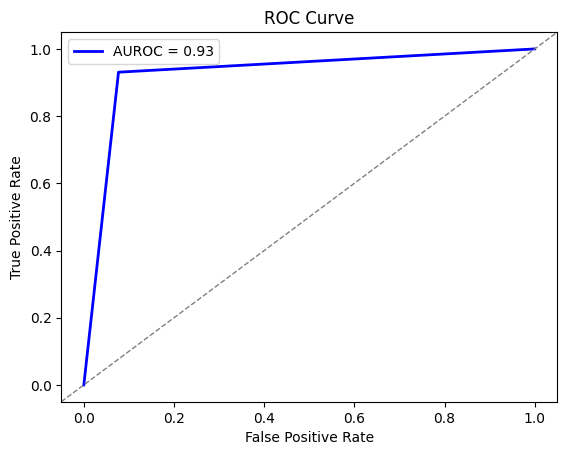

AUROC for max depth 1: 0.93

Accuracy for max depth 2: 95.0%.


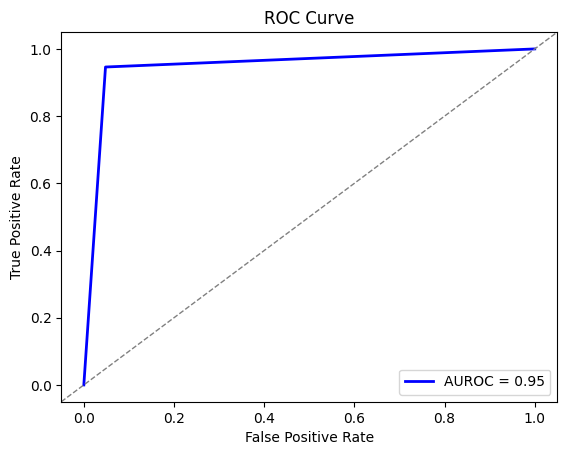

AUROC for max depth 2: 0.95

Accuracy for max depth 3: 92.6%.


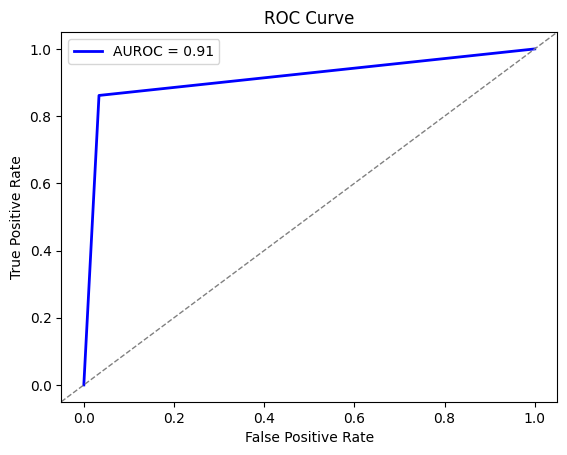

AUROC for max depth 3: 0.91

Accuracy for max depth 4: 95.3%.


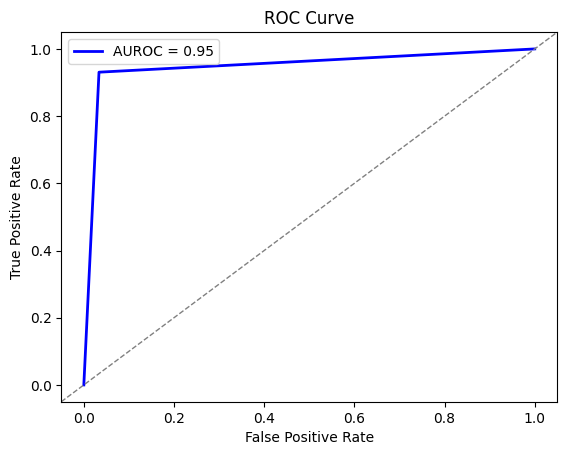

AUROC for max depth 4: 0.95

Accuracy for max depth 5: 95.3%.


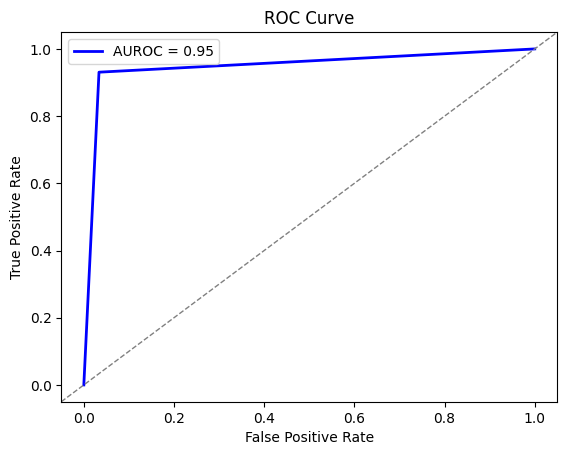

AUROC for max depth 5: 0.95

Accuracy for max depth 6: 94.1%.


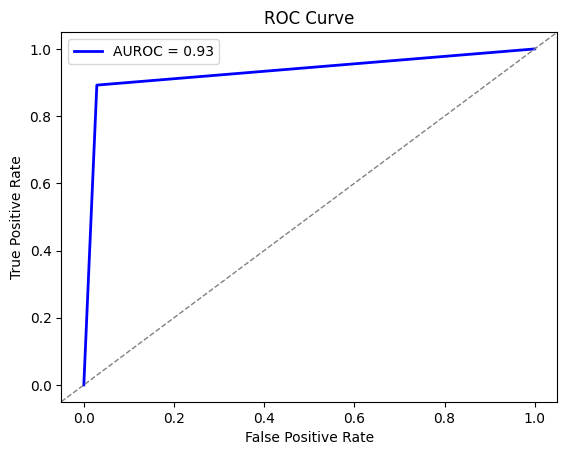

AUROC for max depth 6: 0.93

Accuracy for max depth 7: 95.0%.


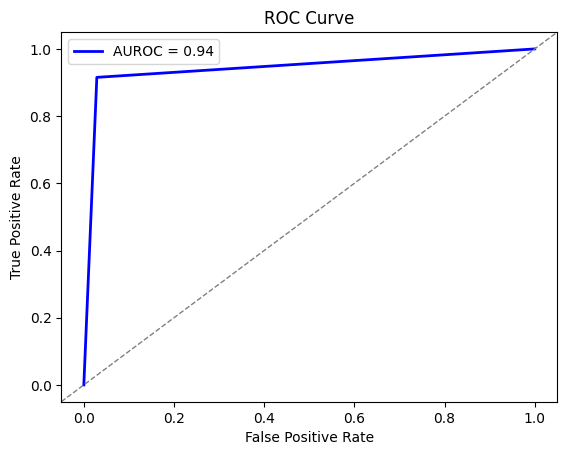

AUROC for max depth 7: 0.94

Accuracy for max depth 8: 95.0%.


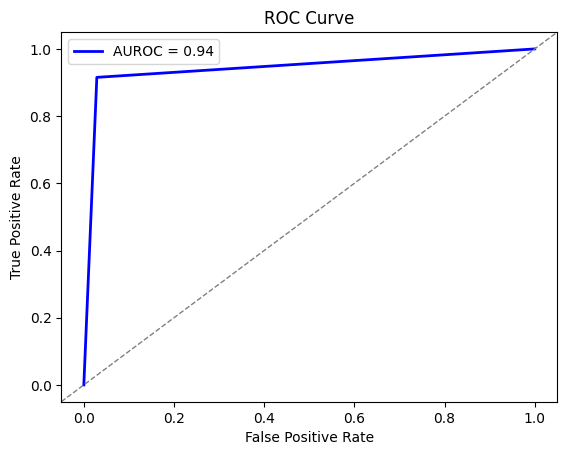

AUROC for max depth 8: 0.94

Accuracy for max depth 9: 95.0%.


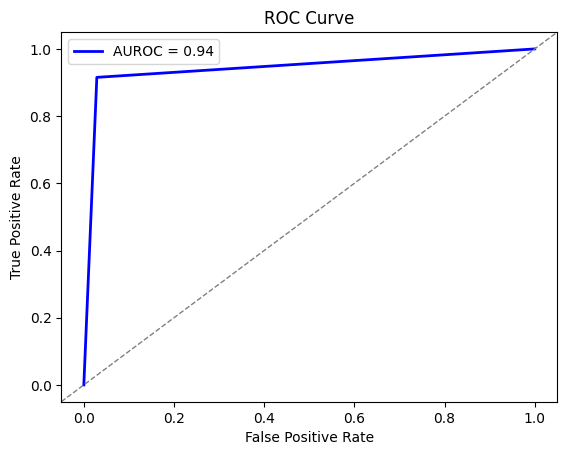

AUROC for max depth 9: 0.94



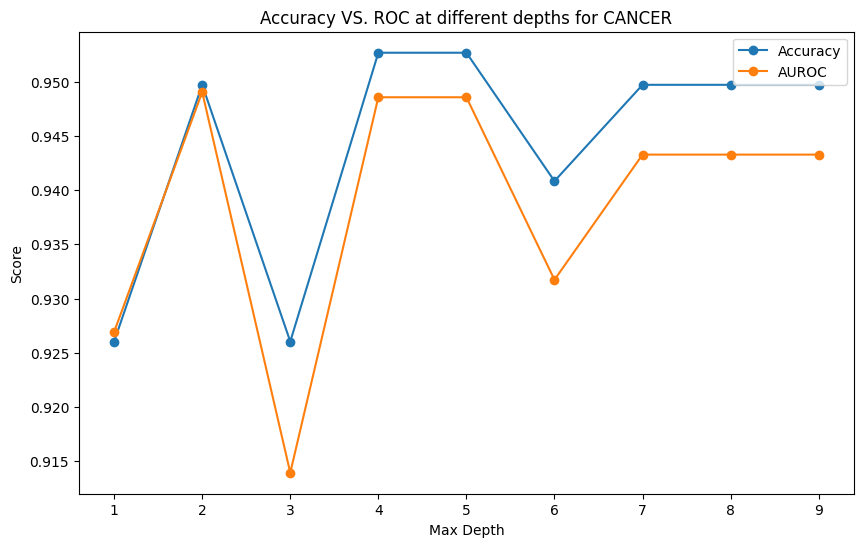

In [ ]:
# Specify the range of max depths to evaluate
max_depth_range = range(1, 10)

# Call the evaluate_tree_depths function
results_df = evaluate_tree_depths(X_train, X_test, y_train, y_test,
                                  max_depth_range, plot_title="Accuracy VS. ROC at different depths for CANCER")

In [ ]:
display(results_df)

,Max_depth,Accuracy,AUROC
0,1,0.926036,0.926923
1,2,0.949704,0.949038
2,3,0.926036,0.913942
3,4,0.952663,0.948558
4,5,0.952663,0.948558
5,6,0.940828,0.931731
6,7,0.949704,0.943269
7,8,0.949704,0.943269
8,9,0.949704,0.943269


We see that
* in NHANES dataset, best depth in [1,9] that has the best accuracy & AUROC is either `depth 1 or 4`
* in CANCER dataset, best depth seems to be at`depth 2 or 4`.

But which metrics should we based on of? This made us to proceed to the next 2 steps:


---



1.   Introduce PR curve, as for class-imbalanced dataset like `NHANES`, it could be a better metrics.
2.   We split the data into `training`, `validation` and `testing` and use the validation set to select the best K and the best tree depth and evaluate the best choice on the test set.

## **Introduce PR curve & Compare AUPRC for different k/depths**

As it is shown below, NHANES contains **extremely class-imbalance data** (wherera CANCER is more balanced) and we suspect that is why its AUROC is always low, no matter what hyperparamter. Hence, we'd like to plot PRC curves for both datasets & see how it affects.

In [ ]:
# distribution of target variables for NHANES
pd.Series(NHANES_y_clean_final.value_counts())

0    1914
1     364
Name: age_group, dtype: int64

In [ ]:
# distribution of target variables for NHANES
pd.Series(CANCER_y_clean_final.value_counts())

0    439
1    236
Name: Class, dtype: int64

**Define a method to calculate & optionally plot PR Curve**

In [ ]:
def calculate_auprc(y_true, y_pred, plot_curve=True, title="Precision-Recall Curve"):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPRC).

    Parameters:
    - y_true: numpy array, true binary labels (0 or 1)
    - y_pred: numpy array, predicted probabilities for the positive class
    - plot_curve: bool, whether to plot the PR curve or not (default is True)
    - title: title of the plot

    Returns:
    - auprc: float, Area Under the Precision-Recall Curve
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    auprc = auc(recall, precision)

    if plot_curve:
        # Plot Precision-Recall curve
        plt.clf()
        plt.plot(recall, precision, "b-", lw=2, label="AUPRC = %0.2f"%auprc)
        plt.axline((0, 1), (1, 1), linestyle="--", lw=1, color='gray')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(title)
        plt.legend(loc="best")
        plt.show()
        #plt.savefig("precision_recall_curve.png", bbox_inches='tight', dpi=300)
    return auprc


### KNN with different K

**Helper function**

In [ ]:
def KNN_calc_acc_prc(X_train, y_train, X_test, y_test, K=5, dist_fn=euclidean, set_title='dataset', print_res=True):
  """
  Compute KNN accuracy and AUPRC for the given training and test data
  """
  knn = KNN(K=K, dist_fn=dist_fn)
  prob, knns = knn.fit(X_train, y_train).predict(X_test)
  pred = get_pred(prob)
  acc = evaluate_acc(y_test, pred)
  auprc = calculate_auprc(y_test, pred, title=f'PRC for {set_title} with {K}-NN', plot_curve=print_res)
  if print_res:
    print(f'{K}-NN accuracy on {set_title} is {acc*100:.2f}%')
    print(f'{K}-NN AUPRC on {set_title} is {auprc*100:.2f}%')
  return acc, auprc

#### Using best K

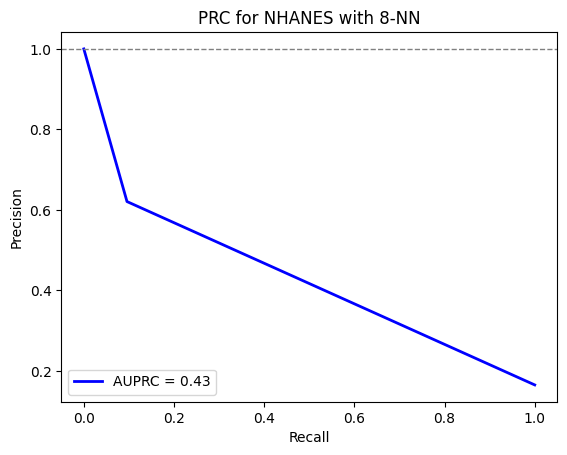

8-NN accuracy on NHANES is 84.11%
8-NN AUPRC on NHANES is 43.28%


(0.8410886742756805, 0.4328440336833806)

In [ ]:
KNN_calc_acc_prc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, NHANES_K, euclidean, 'NHANES')

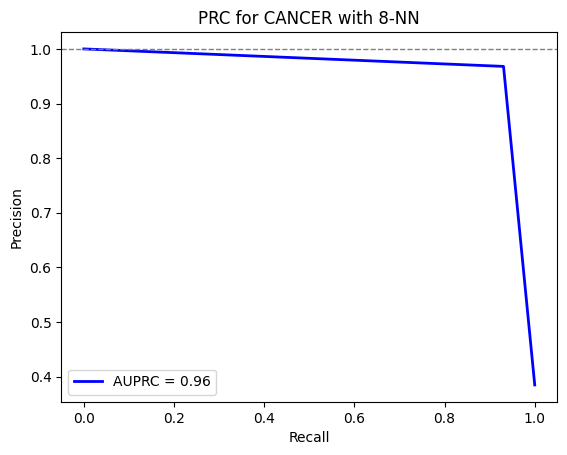

8-NN accuracy on CANCER is 96.15%
8-NN AUPRC on CANCER is 96.27%


(0.9615384615384616, 0.9626982248520709)

In [ ]:
KNN_calc_acc_prc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, CANCER_K, euclidean, 'CANCER')

#### Comparison with AUROC

**NHANES**

In [ ]:
res = []
for i in range(1, 11):
  acc, auroc = KNN_calc_acc_roc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, i, euclidean, print_res=False)
  _, auprc = KNN_calc_acc_prc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, i, euclidean, print_res=False)
  res.append([i, acc, auroc, auprc])

cols = ['K', 'Accuracy', 'AUROC', 'AUPRC']
NHANES_KNN_ROC_PRC = pd.DataFrame(res, columns=cols)
display(NHANES_KNN_ROC_PRC)

,K,Accuracy,AUROC,AUPRC
0,1,0.769096,0.558723,0.322400
1,2,0.824407,0.527832,0.299876
2,3,0.821773,0.564663,0.362848
3,4,0.837577,0.539986,0.395226
4,5,0.827919,0.544872,0.346565
5,6,0.836699,0.533059,0.383695
6,7,0.841089,0.563427,0.430419
7,8,0.841089,0.542089,0.432844
8,9,0.836699,0.550129,0.394966
9,10,0.841089,0.535688,0.441924


**CANCER**

In [ ]:
res = []
for i in range(1, 11):
  acc, auroc = KNN_calc_acc_roc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, i, euclidean, print_res=False)
  _, auprc = KNN_calc_acc_prc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, i, euclidean, print_res=False)
  res.append([i, acc, auroc, auprc])

cols = ['K', 'Accuracy', 'AUROC', 'AUPRC']
NHANES_KNN_ROC_PRC = pd.DataFrame(res, columns=cols)
display(NHANES_KNN_ROC_PRC)

,K,Accuracy,AUROC,AUPRC
0,1,0.961538,0.958654,0.960176
1,2,0.955621,0.946635,0.959201
2,3,0.964497,0.961058,0.963901
3,4,0.955621,0.949519,0.956331
4,5,0.964497,0.961058,0.963901
5,6,0.961538,0.955769,0.962698
6,7,0.964497,0.959615,0.965192
7,8,0.961538,0.955769,0.962698
8,9,0.958580,0.954808,0.957628
9,10,0.964497,0.959615,0.965192


### DT with different maximum depth

#### **Dataset: NHANES**

In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(NHANES_X_clean_standardized.copy(), NHANES_y_clean_final.copy())

Accuracy for max depth 1: 83.5%.
AUROC for max depth 1: 0.50



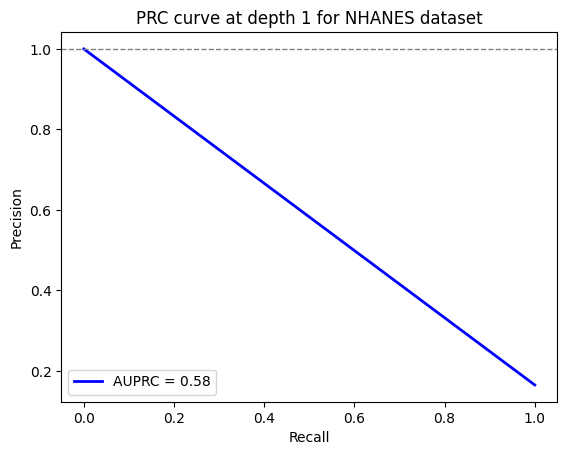

AUPRC for max depth 1: 0.50

Accuracy for max depth 2: 83.5%.
AUROC for max depth 2: 0.50



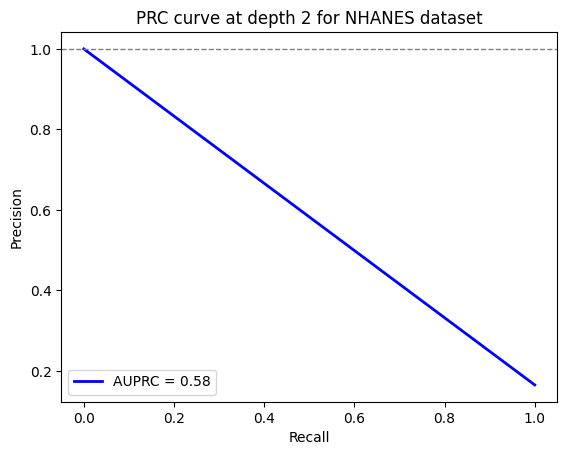

AUPRC for max depth 2: 0.50

Accuracy for max depth 3: 83.4%.
AUROC for max depth 3: 0.50



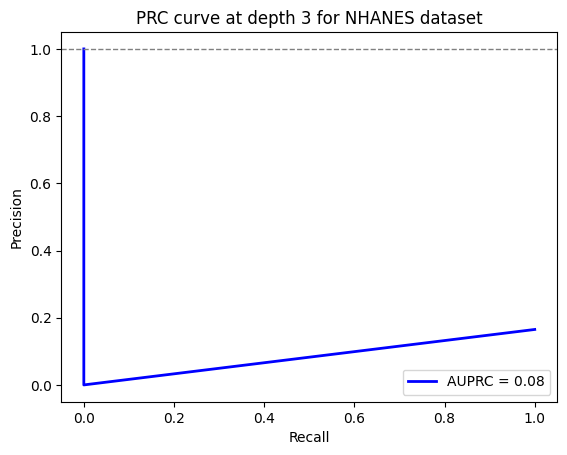

AUPRC for max depth 3: 0.50

Accuracy for max depth 4: 83.1%.
AUROC for max depth 4: 0.57



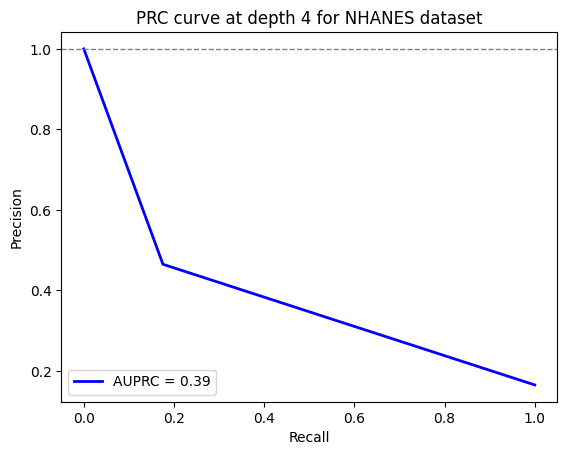

AUPRC for max depth 4: 0.57

Accuracy for max depth 5: 83.1%.
AUROC for max depth 5: 0.53



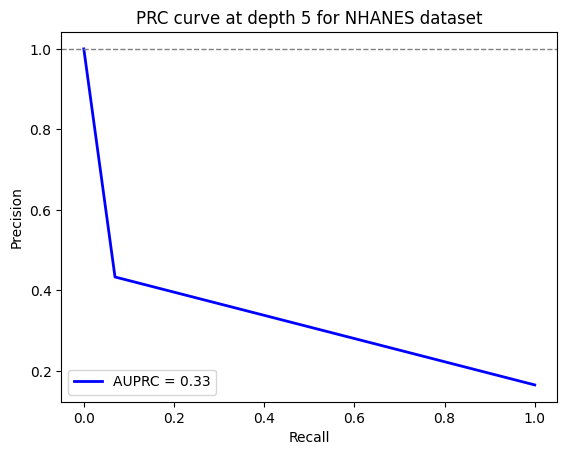

AUPRC for max depth 5: 0.53

Accuracy for max depth 6: 81.8%.
AUROC for max depth 6: 0.53



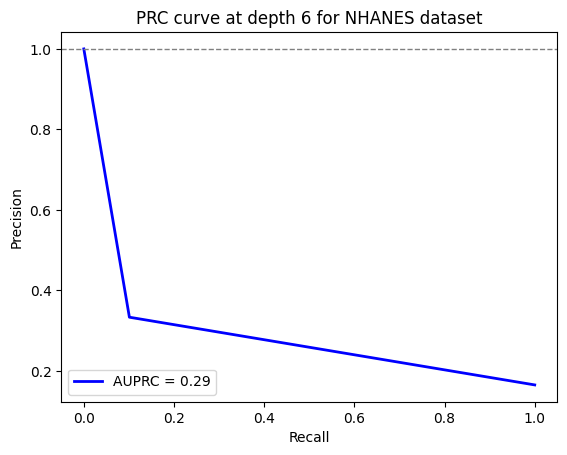

AUPRC for max depth 6: 0.53

Accuracy for max depth 7: 80.7%.
AUROC for max depth 7: 0.55



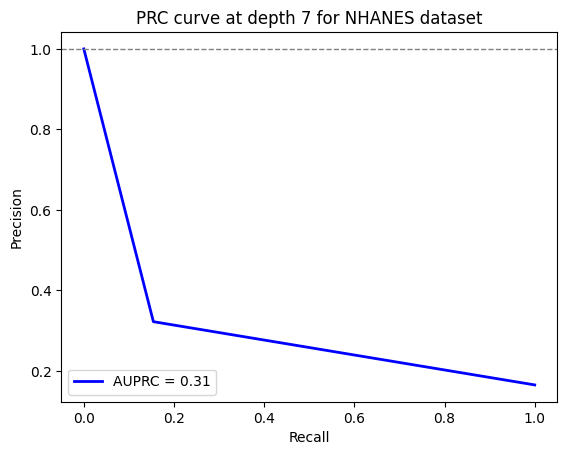

AUPRC for max depth 7: 0.55

Accuracy for max depth 8: 79.9%.
AUROC for max depth 8: 0.54



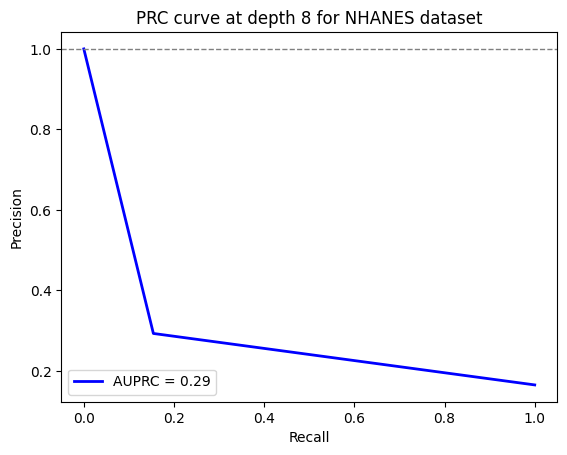

AUPRC for max depth 8: 0.54

Accuracy for max depth 9: 79.8%.
AUROC for max depth 9: 0.55



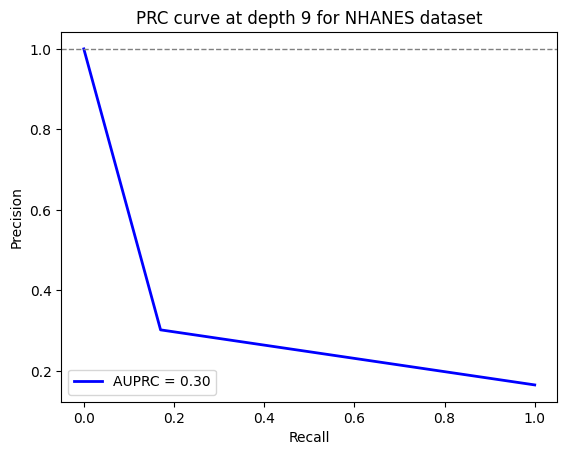

AUPRC for max depth 9: 0.55



In [ ]:
results = []
for depth in range(1,10):
    tree = DecisionTree(max_depth=depth)
    probs_test = tree.fit(X_train, y_train).predict(X_test)
    y_pred = np.argmax(probs_test,1)

    accuracy_score = evaluate_acc(y_test, y_pred)
    print(f'Accuracy for max depth {depth}: {accuracy_score * 100:.1f}%.')
    auroc_score = calculate_auroc(y_test, y_pred, plot_curve=False)
    print(f'AUROC for max depth {depth}: {auroc_score:.2f}\n')
    auprc_score = calculate_auprc(y_test, y_pred,
                                  title=f'PRC curve at depth {depth} for NHANES dataset')
    print(f'AUPRC for max depth {depth}: {auroc_score:.2f}\n')

    results.append([depth, accuracy_score, auroc_score, auprc_score])

# Create a DataFrame with the results
columns = ['Max_depth', 'Accuracy', 'AUROC', 'AUPRC']
nhanes_results_df = pd.DataFrame(results, columns=columns)

#### **Dataset: CANCER**

In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(CANCER_X_clean_standardized.copy(), CANCER_y_clean_final.copy())

Accuracy for max depth 1: 92.6%.
AUROC for max depth 1: 0.93



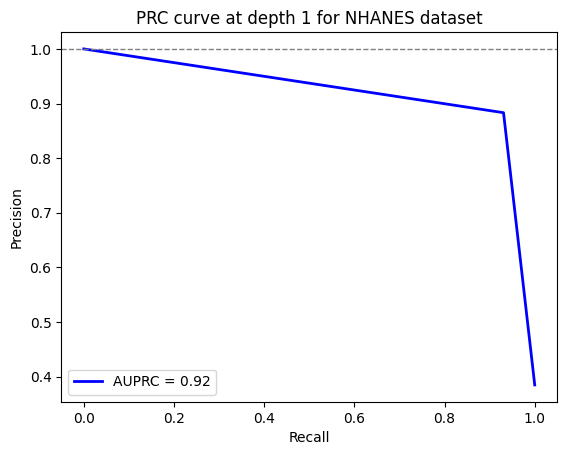

AUPRC for max depth 1: 0.93

Accuracy for max depth 2: 95.0%.
AUROC for max depth 2: 0.95



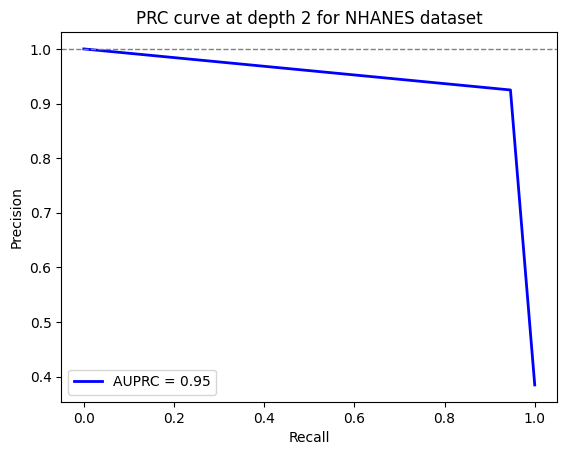

AUPRC for max depth 2: 0.95

Accuracy for max depth 3: 92.6%.
AUROC for max depth 3: 0.91



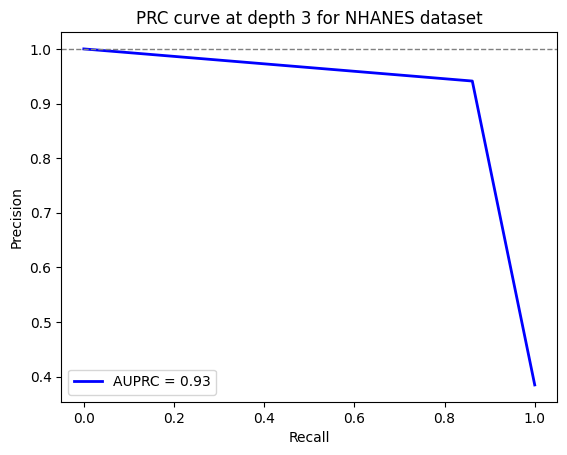

AUPRC for max depth 3: 0.91

Accuracy for max depth 4: 95.3%.
AUROC for max depth 4: 0.95



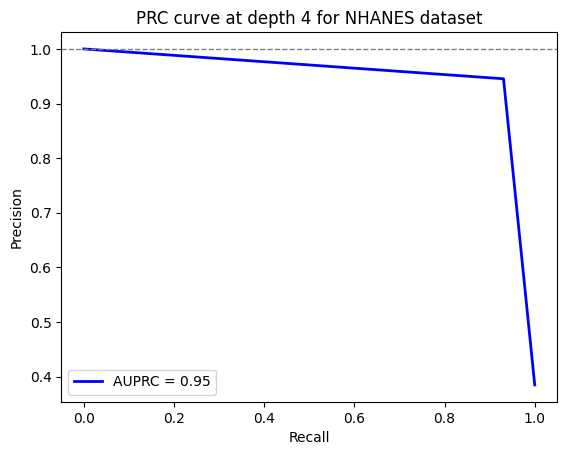

AUPRC for max depth 4: 0.95

Accuracy for max depth 5: 95.3%.
AUROC for max depth 5: 0.95



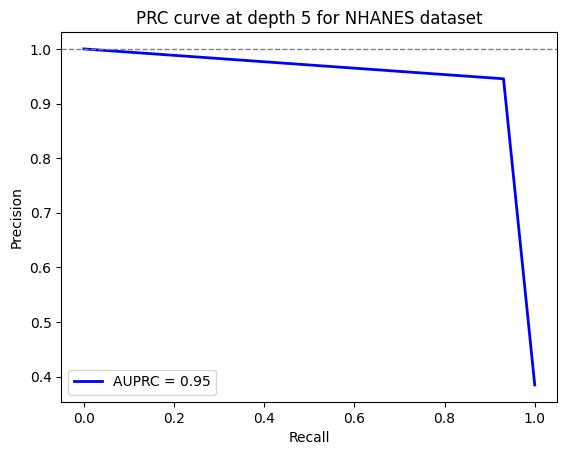

AUPRC for max depth 5: 0.95

Accuracy for max depth 6: 94.1%.
AUROC for max depth 6: 0.93



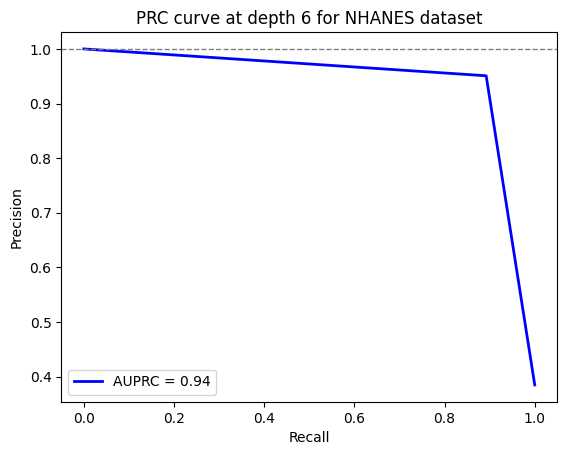

AUPRC for max depth 6: 0.93

Accuracy for max depth 7: 95.0%.
AUROC for max depth 7: 0.94



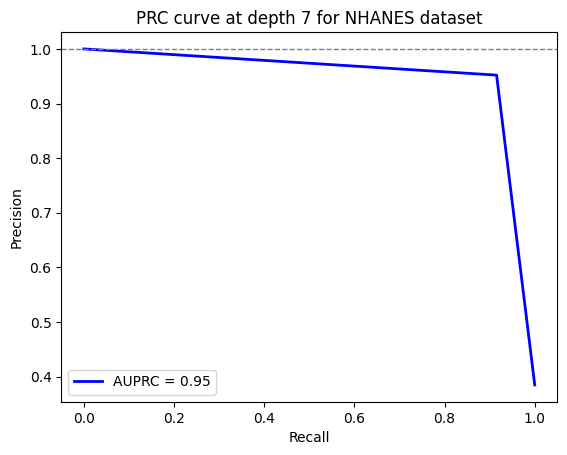

AUPRC for max depth 7: 0.94

Accuracy for max depth 8: 95.0%.
AUROC for max depth 8: 0.94



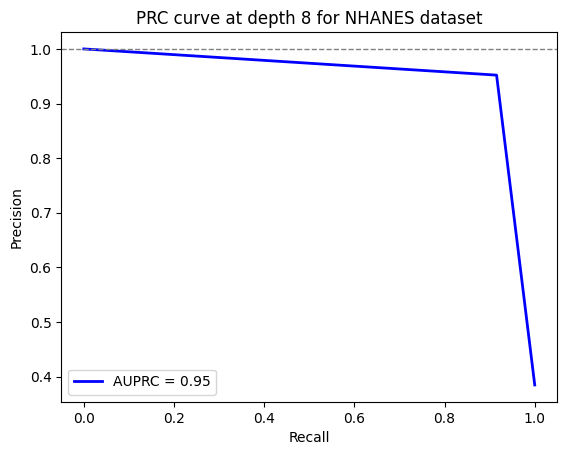

AUPRC for max depth 8: 0.94

Accuracy for max depth 9: 95.0%.
AUROC for max depth 9: 0.94



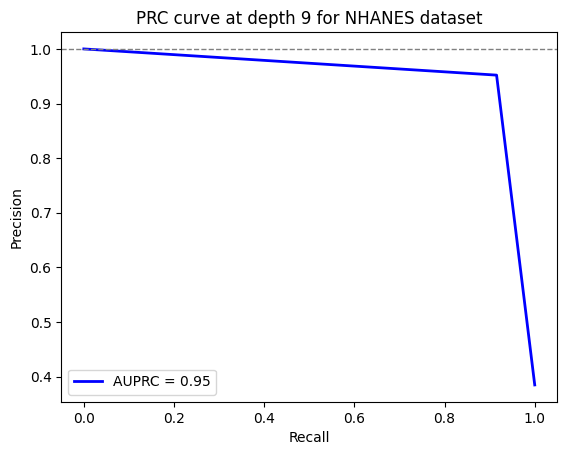

AUPRC for max depth 9: 0.94



In [ ]:
results = []
for depth in range(1,10):
    tree = DecisionTree(max_depth=depth)
    probs_test = tree.fit(X_train, y_train).predict(X_test)
    y_pred = np.argmax(probs_test,1)

    accuracy_score = evaluate_acc(y_test, y_pred)
    print(f'Accuracy for max depth {depth}: {accuracy_score * 100:.1f}%.')
    auroc_score = calculate_auroc(y_test, y_pred, plot_curve=False)
    print(f'AUROC for max depth {depth}: {auroc_score:.2f}\n')
    auprc_score = calculate_auprc(y_test, y_pred,
                                  title=f'PRC curve at depth {depth} for NHANES dataset')
    print(f'AUPRC for max depth {depth}: {auroc_score:.2f}\n')

    results.append([depth, accuracy_score, auroc_score, auprc_score])

# Create a DataFrame with the results
columns = ['Max_depth', 'Accuracy', 'AUROC', 'AUPRC']
cancer_results_df = pd.DataFrame(results, columns=columns)

In [ ]:
print('Metrics comparison at different depths for NHANES dataset')
display(nhanes_results_df)
print('')
print('Metrics comparison at different depths for CANCER dataset')
display(cancer_results_df)

Metrics comparison at different depths for NHANES dataset


,Max_depth,Accuracy,AUROC,AUPRC
0,1,0.834943,0.500000,0.582529
1,2,0.834943,0.500000,0.582529
2,3,0.834065,0.499474,0.082529
3,4,0.830553,0.567787,0.388202
4,5,0.831431,0.525637,0.328063
5,6,0.818262,0.530553,0.291386
6,7,0.806848,0.545056,0.308037
7,8,0.798946,0.540324,0.293390
8,9,0.798068,0.546200,0.304531



Metrics comparison at different depths for CANCER dataset


,Max_depth,Accuracy,AUROC,AUPRC
0,1,0.926036,0.926923,0.920304
1,2,0.949704,0.949038,0.945838
2,3,0.926036,0.913942,0.927985
3,4,0.952663,0.948558,0.951354
4,5,0.952663,0.948558,0.951354
5,6,0.940828,0.931731,0.942274
6,7,0.949704,0.943269,0.949964
7,8,0.949704,0.943269,0.949964
8,9,0.949704,0.943269,0.949964


**Section conclusion about AUPRC & best depth:**
Although we thought AUPRC will improve a lot for the class-imbalanced NHANES dataset

1. NHANES dataset: `depth 1` seems to be optimal, but we are not completely sure about this:
*   at `depth 1`, it has the highest AUPRC (~0.58)
*   at `depth 4`, it has the best AUROC but much lower AUPRC

  but we think that for a class-imbalanced dataset, AUPRC matters more but to be confirmed in later section.


2. CANCER dataset: `depth 3` seems to be the optimal, as it has the highest accuracy, AUROC & AUPRC.

## **Select best K & best depth based on Validation set**

As the past 3 metrics (accuracy, AUROC, AUPRC) still leave us questions about the optimal k/depth, we proceed to this section where we introduce the validation set.

We used the following parameters for splitting the dataset:

*   ~33% for each of test, training, validation
*   set random_state = 123





### **Dataset: NHANES**



#### KNN - Best K

best K = 8, test accuracy = 0.8563829787234043


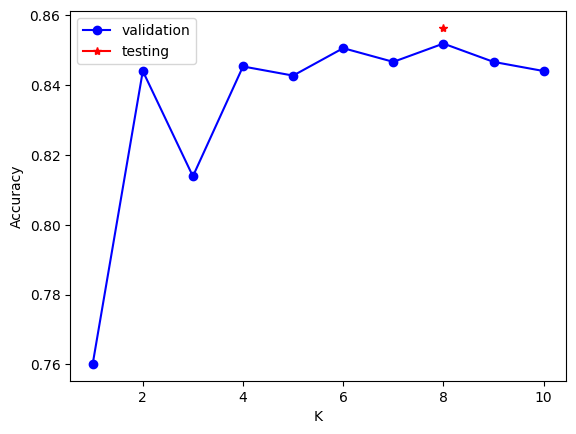

In [ ]:
NHANES_K, NHANES_KNN_ACC = find_best_K(NHANES_features_standardized, NHANES_targets, test_size=0.33, visualize=True)

#### DT - Best depth

Utility Function

In [ ]:
def find_best_depth_using_validation_set(X_train, X_test, y_train, y_test, plot_title):
    model_choices = []
    train_acc = []
    valid_acc = []

    X_train_tr, X_train_va, y_train_tr, y_train_va = train_test_split(X_train, y_train, test_size=0.5, random_state=123)

    n_train = y_train_tr.shape[0]
    n_valid = y_train_va.shape[0]

    for k in range(1, 10):
        dt = DecisionTree(max_depth=k)

        y_train_tr_prob = dt.fit(X_train_tr, y_train_tr).predict(X_train_tr)
        y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
        acc_tr = np.sum(y_train_tr_pred == y_train_tr) / n_train

        y_train_va_prob = dt.fit(X_train_tr, y_train_tr).predict(X_train_va)
        y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
        acc_va = np.sum(y_train_va_pred == y_train_va) / n_valid

        model_choices.append(k)
        train_acc.append(acc_tr)
        valid_acc.append(acc_va)

    best_depth = model_choices[valid_acc.index(max(valid_acc))]
    dt = DecisionTree(max_depth=best_depth)
    y_test_prob = dt.fit(X_train, y_train).predict(X_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = np.sum(y_test_pred == y_test) / y_test.shape[0]

    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("Tree depth")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.title(plot_title)
    plt.show()

    return best_depth, test_accuracy

In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(NHANES_X_clean_standardized.copy(), NHANES_y_clean_final.copy(),
                                              test_size=0.33)

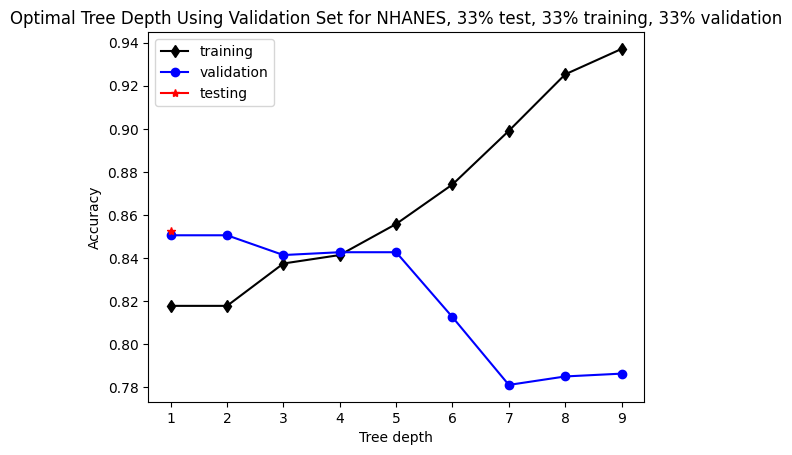

Best depth = 1, Test accuracy = 0.8523936170212766


In [ ]:
# find best depth for NHANES
best_depth, test_accuracy = find_best_depth_using_validation_set(X_train, X_test, y_train, y_test,
                        plot_title="Optimal Tree Depth Using Validation Set for NHANES, 33% test, 33% training, 33% validation")
print(f'Best depth = {best_depth}, Test accuracy = {test_accuracy}')

### side note: different splitting ratio produces different results



*   When we use 50% test, 25% training, 25% validation, instead of 33% for each
  *   we got best `depth = 4` for NHANES



In [ ]:
test_size=0.5

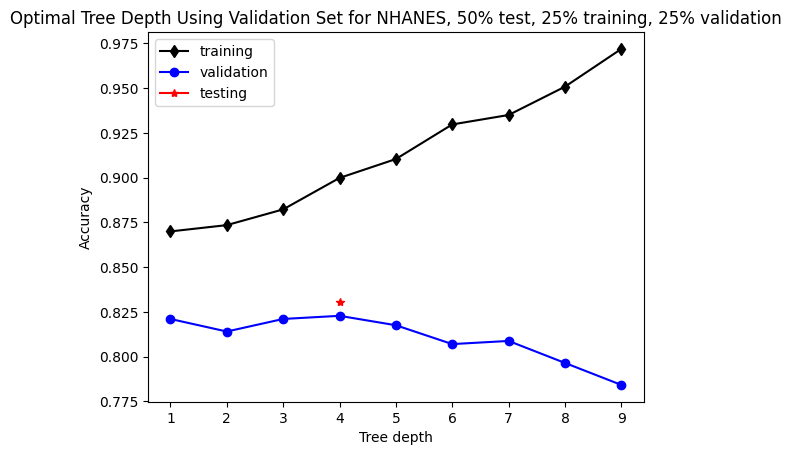

Best depth = 4, Test accuracy = 0.8305531167690957


In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(NHANES_X_clean_standardized.copy(), NHANES_y_clean_final.copy(),
                                              test_size=test_size)

# find best depth for CANCER
best_depth, test_accuracy = find_best_depth_using_validation_set(X_train, X_test, y_train, y_test,
                        plot_title="Optimal Tree Depth Using Validation Set for NHANES, 50% test, 25% training, 25% validation")
print(f'Best depth = {best_depth}, Test accuracy = {test_accuracy}')

### **Dataset: CANCER**



#### KNN - Best K

best K = 8, test accuracy = 0.9730941704035875


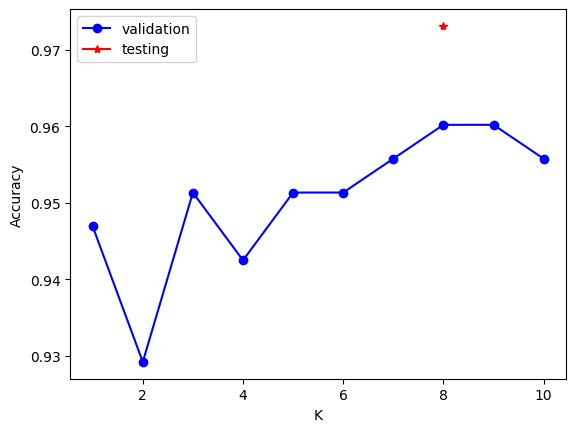

In [ ]:
CANCER_K, CANCER_KNN_ACC = find_best_K(CANCER_features_standardized, CANCER_targets, test_size=0.33, visualize=True)

#### DT - Best depth

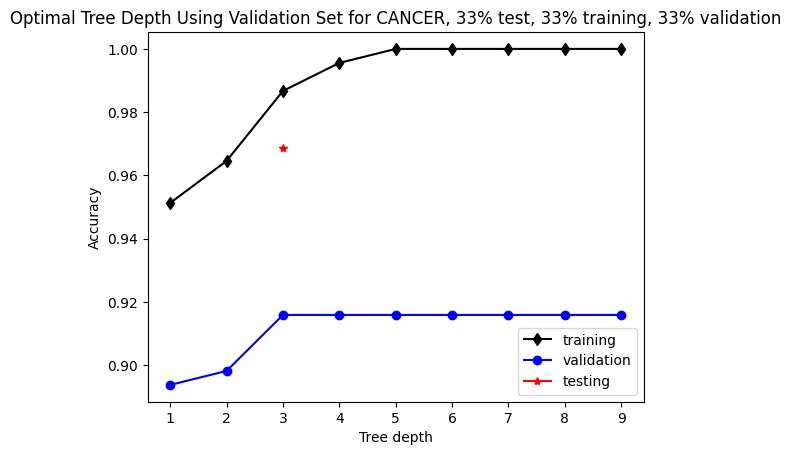

Best depth = 3, Test accuracy = 0.968609865470852


In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(CANCER_X_clean_standardized.copy(), CANCER_y_clean_final.copy(),
                                              test_size=0.33)

# find best depth for CANCER
best_depth, test_accuracy = find_best_depth_using_validation_set(X_train, X_test, y_train, y_test,
                        plot_title="Optimal Tree Depth Using Validation Set for CANCER, 33% test, 33% training, 33% validation")
print(f'Best depth = {best_depth}, Test accuracy = {test_accuracy}')

Section Conclusion:

For DT, the use of a validation set further enhanced our prediction by just comparing accuracy, AUROC, AUPRC where we concludes:


*   NHANES: best `depth = 1`, or `depth = 4` when we split the data differently
*   CANCER: best `depth = 3`

Hence, having the best maximum depth being 1 hints that NHANES dataset isn't performing well when using DT.



## **Distance/Cost Function Comparison**

### Distance

#### Dataset: NHANES

best K = 8, test accuracy = 0.8563829787234043


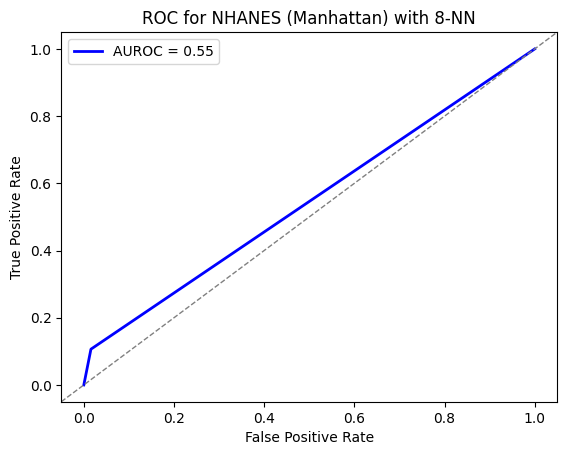

8-NN accuracy on NHANES (Manhattan) is 83.93%
8-NN AUROC on NHANES (Manhattan) is 54.53%


(0.839332748024583, 0.5453050540304718)

In [ ]:
NHANES_K_MANHATTAN, _ = find_best_K(NHANES_features_standardized, NHANES_targets, dist_fn=manhattan, test_size=0.33, visualize=False)
KNN_calc_acc_roc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, NHANES_K_MANHATTAN, manhattan, 'NHANES (Manhattan)')

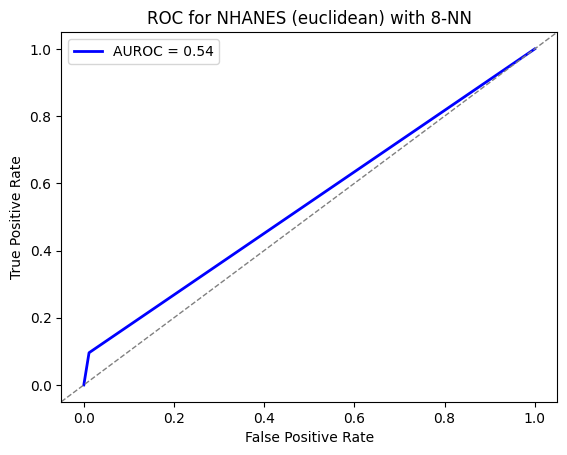

8-NN accuracy on NHANES (euclidean) is 84.11%
8-NN AUROC on NHANES (euclidean) is 54.21%


(0.8410886742756805, 0.542088954515963)

In [ ]:
KNN_calc_acc_roc(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, NHANES_K, euclidean, 'NHANES (euclidean)')

#### Dataset: CANCER

best K = 1, test accuracy = 0.9551569506726457


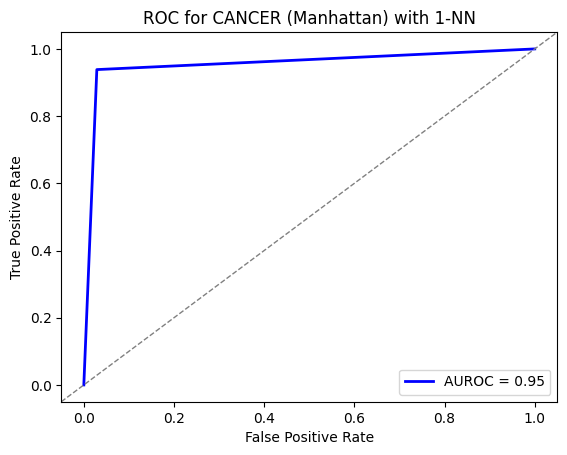

1-NN accuracy on CANCER (Manhattan) is 95.86%
1-NN AUROC on CANCER (Manhattan) is 95.48%


(0.9585798816568047, 0.9548076923076922)

In [ ]:
CANCER_K_MANHATTAN, _ = find_best_K(CANCER_features_standardized, CANCER_targets, dist_fn=manhattan, test_size=0.33, visualize=False)
KNN_calc_acc_roc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, CANCER_K_MANHATTAN, manhattan, 'CANCER (Manhattan)')

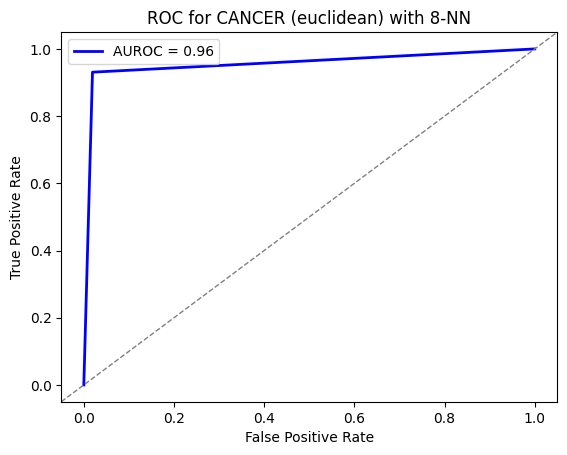

8-NN accuracy on CANCER (euclidean) is 96.15%
8-NN AUROC on CANCER (euclidean) is 95.58%


(0.9615384615384616, 0.9557692307692307)

In [ ]:
KNN_calc_acc_roc(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, CANCER_K, euclidean, 'CANCER (euclidean)')

### Cost Functions
In this section we compare the differences in **accuracy, AUROC, AUPRC** for different cost functions used in Decision Tree.

In [ ]:
# self-defined method
def evaluate_model_diff_cost(X_train, X_test, y_train, y_test, depth, cost_fn):
    """
    Evaluate a Decision Tree model with a specified cost function on a given dataset.

    Parameters:
    - X_train: numpy array, feature matrix of the training set
    - X_test: numpy array, feature matrix of the testing set
    - y_train: numpy array, true labels of the training set
    - y_test: numpy array, true labels of the testing set
    - depth: int, maximum depth of the Decision Tree
    - cost_fn: function, cost function used for splitting nodes in the Decision Tree

    Returns:
    - result: list, containing the following metrics:
      - Cost Function Name: Name of the cost function used
      - Accuracy Score: Accuracy of the model on the testing set
      - AUROC Score: Area Under the Receiver Operating Characteristic Curve
      - AUPRC Score: Area Under the Precision-Recall Curve
    """

    # Create and fit the Decision Tree model
    tree = DecisionTree(max_depth=depth, cost_fn=cost_fn)
    probs_test = tree.fit(X_train, y_train).predict(X_test)
    y_pred = np.argmax(probs_test, 1)

    # Evaluate accuracy
    accuracy_score = evaluate_acc(y_test, y_pred)

    # Evaluate AUROC
    auroc_score = calculate_auroc(y_test, y_pred, plot_curve=False)

    # Evaluate AUPRC
    auprc_score = calculate_auprc(y_test, y_pred, plot_curve=False)

    # Return the results as a list
    result = [cost_fn.__name__, accuracy_score, auroc_score, auprc_score]
    return result

def evaluate_model_with_multiple_cost_functions(X_train, X_test, y_train, y_test, depth, cost_fns):
    """
    Evaluate a Decision Tree model using different cost functions and return the results in a DataFrame.

    Parameters:
    - X_train: numpy array, training data features
    - X_test: numpy array, testing data features
    - y_train: numpy array, training data labels
    - y_test: numpy array, testing data labels
    - depth: int, depth of the Decision Tree
    - cost_fns: list of cost functions to evaluate

    Returns:
    - results_df: pandas DataFrame, containing evaluation results for different cost functions
    """
    results = []

    for fn in cost_fns:
        result = evaluate_model_diff_cost(X_train, X_test, y_train, y_test, depth, fn)
        results.append(result)
        # print(f'Cost Function: {result[0]}, Accuracy: {result[1] * 100:.1f}%, AUROC: {result[2]:.2f}, AUPRC: {result[3]:.2f}')

    # Create a DataFrame with the results
    columns = ['Cost Function', 'Accuracy', 'AUROC', 'AUPRC']
    results_df = pd.DataFrame(results, columns=columns)

    return results_df


In [ ]:
cost_fns = [cost_misclassification, cost_entropy, cost_gini_index]

#### **Dataset: NHANES**

Things are special for NHANES since we found that the 2 potential best depths are `depth 1 ` and `depth 4`, we will show both results


In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(NHANES_X_clean_standardized.copy(), NHANES_y_clean_final.copy())


In [ ]:

depth = 1  # one of best depths for NHANES
results_df = evaluate_model_with_multiple_cost_functions(X_train, X_test, y_train, y_test, depth, cost_fns)
print('\nCost function comparison for NHANES dataset at depth 1')
display(results_df)

depth = 4  # one of best depths for NHANES
results_df = evaluate_model_with_multiple_cost_functions(X_train, X_test, y_train, y_test, depth, cost_fns)
print('\nCost function comparison for NHANES dataset at depth 4')
display(results_df)


Cost function comparison for NHANES dataset at depth 1


,Cost Function,Accuracy,AUROC,AUPRC
0,cost_misclassification,0.834943,0.5,0.582529
1,cost_entropy,0.834943,0.5,0.582529
2,cost_gini_index,0.834943,0.5,0.582529



Cost function comparison for NHANES dataset at depth 4


,Cost Function,Accuracy,AUROC,AUPRC
0,cost_misclassification,0.834065,0.518679,0.339356
1,cost_entropy,0.831431,0.568313,0.391522
2,cost_gini_index,0.830553,0.567787,0.388202



**Conclusion for NHANES:**
*   depth 1: There is no difference in any of the 3 metrics;
*   depth 4: we see
  - misclassification rate has the best accuracy, but worest AUROC & AUPRC
  - entropy has the best AUROC & AUPRC

#### **Dataset: CANCER**

In [ ]:
# split data
X_train, X_test, y_train, y_test = split_data(CANCER_X_clean_standardized.copy(), CANCER_y_clean_final.copy())

In [ ]:
depth = 3  # best depth for CANCER
results_df = evaluate_model_with_multiple_cost_functions(X_train, X_test, y_train, y_test, depth, cost_fns)
print('\nCost function comparison for CANCER dataset')
display(results_df)


Cost function comparison for CANCER dataset


,Cost Function,Accuracy,AUROC,AUPRC
0,cost_misclassification,0.967456,0.964904,0.966419
1,cost_entropy,0.928994,0.917788,0.930597
2,cost_gini_index,0.926036,0.913942,0.927985



**Conclusion for CANCER:**
We used best depth (`depth = 3`)for this dataset, according to previous section

*   depth 3: **Gini index** produces the best value for all 3 metrics.


---


**Section Conclusion:**

Different cost functions seems
* more consistent for CANCER (the dataset that always produce better accuracy),
* whereas for NHANES, different cost functions affects a lot the 3 metrics.

## K-fold Cross Validation


#### Dataset: NHANES

In [ ]:
X = NHANES_X_clean_standardized.copy()
y = NHANES_y_clean_final.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

NHANES_X_ARR = X.to_numpy()
NHANES_y_ARR = y.to_numpy()

#print(NHANES_y_ARR)

In [ ]:
def cross_validate(KNN, X, y, model,n_folds=5):
    fold_size = int(len(X) / n_folds)
    np.random.seed(1)
    indices = np.random.permutation(len(X))
    accuracy_scores = []

    for i in range(n_folds):
        begin = i * fold_size
        end = (i + 1) * fold_size
        test_indices = indices[begin:end]
        train_indices = np.concatenate((indices[:begin], indices[end:]))

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        KNN.fit(X_train, y_train)
        k_fold_y_prob, k_fold_knns = KNN.predict(X_test)
        k_fold_y_pred = np.argmax(k_fold_y_prob,axis = -1)
        accuracy = np.sum(k_fold_y_pred == y_test) / len(y_test)
        accuracy_scores.append(accuracy)

    return np.mean(accuracy_scores)


cv = KNN()
cv.fit(X_train,y_train)
regular_prob, regular_knns = cv.predict(X_test)
regular_y_pred = np.argmax(regular_prob,axis=-1)
regular_accurcay = evaluate_acc(y_test, regular_y_pred)
print("Prediction without 5-fold gets ",regular_accurcay)
#print(regular y pred)
accuracy_with_k_fold = cross_validate(cv, NHANES_X_ARR, NHANES_y_ARR, KNN, n_folds=5)
print("Prediction with 5-fold gets ",accuracy_with_k_fold)


Prediction without 5-fold gets  0.7690956979806848
Prediction with 5-fold gets  0.7740659340659339


#### Dataset: CANCER

In [ ]:
X = CANCER_X_clean_standardized.copy()
y = CANCER_y_clean_final.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

CANCER_X_ARR = X.to_numpy()
CANCER_y_ARR = y.to_numpy()

#print(CANCER_y_ARR)

In [ ]:
cv_cancer = KNN()
cv_cancer.fit(X_train, y_train)
regular_prob_cancer, regular_knns_cancer = cv_cancer.predict(X_test)
regular_y_pred_cancer = np.argmax(regular_prob_cancer,axis=-1)
regular_accurcay_cancer = evaluate_acc(y_test, regular_y_pred_cancer)
print("Prediction without 5-fold gets ",regular_accurcay_cancer)
#print(regular y pred)
accuracy_with_k_fold_cancer = cross_validate(cv_cancer, CANCER_X_ARR, CANCER_y_ARR, KNN, n_folds=5)
print("Prediction with 5-fold gets ",accuracy_with_k_fold_cancer)


Prediction without 5-fold gets  0.9615384615384616
Prediction with 5-fold gets  0.9555555555555557


As the result of prediction with and without 5-fold cross validation on both sets shown, using k-fold or not doesn't make a big difference. The reason is that as mentioned in class, k-fold would make a significant difference when the dataset is small, like the example given in class is 50. However here in both datasets we have a decent amount of datapoints. Therefore k-fold cross validation doesn't change the prediction accuracy.

## **Method Comparison: Plot ROC for both models**

**Utility functions**

In [ ]:
def get_knn_pred(X_train, y_train, X_test, y_test, K=5, dist_fn=euclidean):
  """
  Compute KNN prediction for given K and dataset
  """
  knn = KNN(K=K, dist_fn=dist_fn)
  prob, knns = knn.fit(X_train, y_train).predict(X_test)
  pred = get_pred(prob)
  return pred


def get_dt_pred(X_train, y_train, X_test, y_test, max_depth=3, cost_fn=cost_gini_index):
    tree = DecisionTree(max_depth=max_depth, cost_fn=cost_fn)
    probs_test = tree.fit(X_train, y_train).predict(X_test)
    y_pred = np.argmax(probs_test,1)
    return y_pred


def calculate_auroc_knn_dt(y_true, y_pred_knn, y_pred_dt, plot_curve=True, title="KNN and DT ROC curve"):
    fpr_knn, tpr_knn, thresh_knn = roc_curve(y_true, y_pred_knn)
    auroc_knn = roc_auc_score(y_true, y_pred_knn)
    fpr_dt, tpr_dt, thresh_dt = roc_curve(y_true, y_pred_dt)
    auroc_dt = roc_auc_score(y_true, y_pred_dt)

    if plot_curve:
        # Plot ROC curve
        plt.clf()
        plt.plot(fpr_knn, tpr_knn, "b-", lw=2, label="KNN AUROC = %0.2f"%auroc_knn)
        plt.plot(fpr_dt, tpr_dt, "r-", lw=2, label="DT AUROC = %0.2f"%auroc_dt)
        plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="best")
        plt.show()
        #plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)
    return auroc_knn, auroc_dt

### NHANES

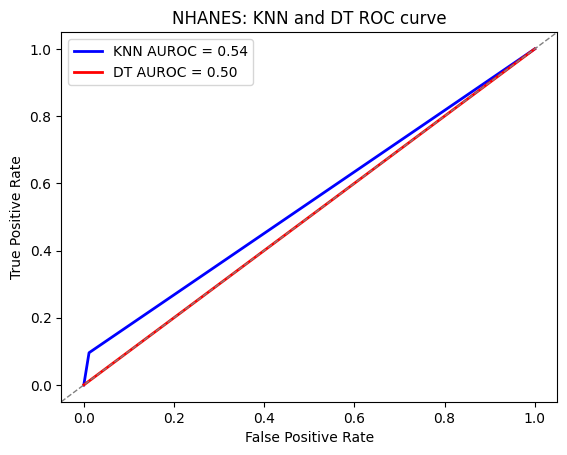

8-NN accuracy on NHANES is 84.11%
1 depth DT accuracy on NHANES is 83.49%


In [ ]:
knn_pred = get_knn_pred(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, NHANES_K, euclidean)
dt_pred = get_dt_pred(NHANES_X_train, NHANES_y_train, NHANES_X_test, NHANES_y_test, NHANES_DEPTH, cost_gini_index)
calculate_auroc_knn_dt(NHANES_y_test, knn_pred, dt_pred, title="NHANES: KNN and DT ROC curve")

knn_acc = evaluate_acc(NHANES_y_test, knn_pred)
dt_acc = evaluate_acc(NHANES_y_test, dt_pred)
print(f'{NHANES_K}-NN accuracy on NHANES is {knn_acc*100:.2f}%')
print(f'{NHANES_DEPTH} depth DT accuracy on NHANES is {dt_acc*100:.2f}%')

### CANCER

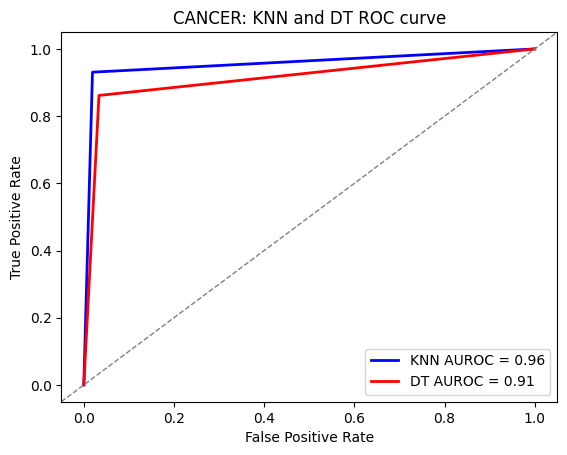

8-NN accuracy on CANCER is 96.15%
3 depth DT accuracy on CANCER is 92.60%


In [ ]:
knn_pred = get_knn_pred(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, CANCER_K, euclidean)
dt_pred = get_dt_pred(CANCER_X_train, CANCER_y_train, CANCER_X_test, CANCER_y_test, CANCER_DEPTH, cost_gini_index)
calculate_auroc_knn_dt(CANCER_y_test, knn_pred, dt_pred, title="CANCER: KNN and DT ROC curve")

knn_acc = evaluate_acc(CANCER_y_test, knn_pred)
dt_acc = evaluate_acc(CANCER_y_test, dt_pred)
print(f'{CANCER_K}-NN accuracy on CANCER is {knn_acc*100:.2f}%')
print(f'{CANCER_DEPTH} depth DT accuracy on CANCER is {dt_acc*100:.2f}%')

## **Describe how you obtain the key features used in KNN**

For both datasets, we mainly considered the squared difference of the means between the positive and negative groups to select the features to use in KNN. For NHANES, we've selected the top three features with the highest mean difference squared: LBXGLT, LBXGLU, and LBXIN. For CANCER, we've decided to use all nine features since they all had significant mean difference squared values, and by dropping one or more of the features, the accuracy of KNN decreases.

## **Rough feature importance score in DT**

To get rough feature importance score in DT, we implement 2 helper methods for counting the occurrence of each feature in the tree & rank them accordingly.

In [ ]:
# 2 helper methods to compute feature importance
def compute_feature_importance(self):
    feature_count = np.zeros(self.data.shape[1])  # Initialize an array to store the count for each feature
    self._traverse_tree(self.root, feature_count)  # Start traversing the tree
    return feature_count
def _traverse_tree(self, node, feature_count):
    if node.left:  # If the node has children (i.e., it is not a leaf node)
        feature_count[node.split_feature] += 1  # Increment the count for the split feature
        self._traverse_tree(node.left, feature_count)  # Recursively traverse the left child
        self._traverse_tree(node.right, feature_count)  # Recursively traverse the right child

DecisionTree.compute_feature_importance = compute_feature_importance
DecisionTree._traverse_tree = _traverse_tree

In [ ]:
def evaluate_model_feature_importance(X_train, y_train, depth, cost_fn = cost_gini_index, feature_names: list = None, dataset_name: str = None):
    # Create and fit the Decision Tree model
    tree = DecisionTree(max_depth=depth, cost_fn=cost_fn)
    tree = tree.fit(X_train, y_train)

    # Compute feature importance scores
    feature_importance_scores = tree.compute_feature_importance()

    # Print the top 5 most important features with their names
    print(f'Top 5 Most Important Features in {dataset_name} dataset:')
    top_5_features = np.argsort(feature_importance_scores)[::-1][:5]
    for feature_index in top_5_features:
        feature_name = feature_names[feature_index]
        print(f"Feature '{feature_name}': {feature_importance_scores[feature_index]}")

#### **Dataset: NHANES**

Here we use `depth = 4` since depth = 1 would not produce useful result for top 5 feature ranking.

In [ ]:
X = NHANES_X_clean_standardized.copy()
y = NHANES_y_clean_final.copy()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Get the column names from NHANES_X_clean_standardized
feature_names = NHANES_X_clean_standardized.columns
evaluate_model_feature_importance(X_train, y_train, depth=4, cost_fn = cost_gini_index, feature_names = feature_names, dataset_name = 'NHANES')

Top 5 Most Important Features in NHANES dataset:
Feature 'LBXGLT': 5.0
Feature 'LBXIN': 3.0
Feature 'LBXGLU': 3.0
Feature 'BMXBMI': 2.0
Feature 'DIQ010': 1.0


#### **Dataset: CANCER**

Here we use `depth = 3` as it is the best depth found by validation set.

In [ ]:
X = CANCER_X_clean_standardized.copy()
y = CANCER_y_clean_final.copy()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Get the column names from NHANES_X_clean_standardized
feature_names = CANCER_X_clean_standardized.columns
evaluate_model_feature_importance(X_train, y_train, depth=3, cost_fn = cost_gini_index, feature_names = feature_names, dataset_name = 'NHANES')

Top 5 Most Important Features in NHANES dataset:
Feature 'Bare_nuclei': 3.0
Feature 'Marginal_adhesion': 1.0
Feature 'Uniformity_of_cell_shape': 1.0
Feature 'Uniformity_of_cell_size': 1.0
Feature 'Clump_thickness': 1.0


**Section Conclusion:**


Q: Are they the same as the simple mean difference approach described in the subtask 3 in Section 2? If not, why?
A:

In [ ]:
# square diff comparison from subtask 3 section 2
display(NHANES_means_sorted)
display(CANCER_means_sorted)

,Senior mean,Adult mean,Squared diff
LBXGLT,141.208791,109.990596,974.575736
LBXGLU,104.329670,98.644723,32.318625
LBXIN,10.405247,12.106661,2.894810
PAQ605,1.909341,1.806165,0.010645
BMXBMI,27.886264,27.968286,0.006728
DIQ010,2.027473,2.014107,0.000179
RIAGENDR,1.508242,1.512017,0.000014


,Malignant mean,Benign mean,Squared diff
Bare_nuclei,7.605932,1.350797,39.126713
Uniformity_of_cell_size,6.563559,1.309795,27.602040
Uniformity_of_cell_shape,6.538136,1.419134,26.204173
Normal_nucleoli,5.902542,1.264237,21.513878
Marginal_adhesion,5.635593,1.350797,18.359476
Clump_thickness,7.203390,2.972665,17.899031
Bland_chromatin,5.978814,2.079727,15.202879
Single_epithelial_cell_size,5.305085,2.113895,10.183691
Mitoses,2.614407,1.066059,2.397380


**Answer:
Not entirely aligned.
In a Decision Tree, feature importance is typically assessed based on how much a feature contributes to reducing the impurity (e.g., Gini impurity) in the nodes. This calculation is NOT solely based on the differences between positive and negative groups for a feature.**

1.   NHANES dataset: mostly aligned with subtask 3.2, with exceptions when squared differences are small.

  *   The top 3 features from feature importance are indeed the top 3 features from calculating squared difference, and there are the only one with squared difference greatter than 1.
  *   All the rest features initailly have a very small square differences (<= 0.01) so rough feature importance can't really differentiate them.


2.   CANCER dataset: mostly aligned with subtask 3.2
  * 4/5 features are also in top 5 in squared differences, only the 2nd place feature `'Normal_nucleoli'` was from at 6th place if considering square differences.
